## <center>Classificação de Mutações Genéticas Clinicamente Acionáveis</center>

## Medicina Personalizada - Redefinindo o  Tratamento de Câncer

>>> Predict the effect of Genetic Variants to enable Personalized Medicine

### Definição problema

**Embora o papel dos testes genéticos no avanço de nossa compreensão do câncer e no desenvolvimento de tratamentos mais precisos e eficazes seja muito promissor, o progresso tem sido lento devido à quantidade significativa de trabalho manual ainda necessário para entender a genômica.**

Eventualmente, muito tem sido dito durante os últimos anos sobre como a medicina de  precisão e, mais concretamente, como o teste genético, vai provocar disrupção no tratamento de doenças como o câncer.Mas isso ainda está acontecendo apenas parcialmente devido à enorme  quantidade de trabalho manual ainda necessário. **Neste projeto, tentaremos levar a medicina personalizada ao seu potencial máximo.**


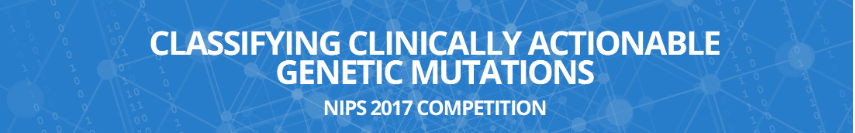
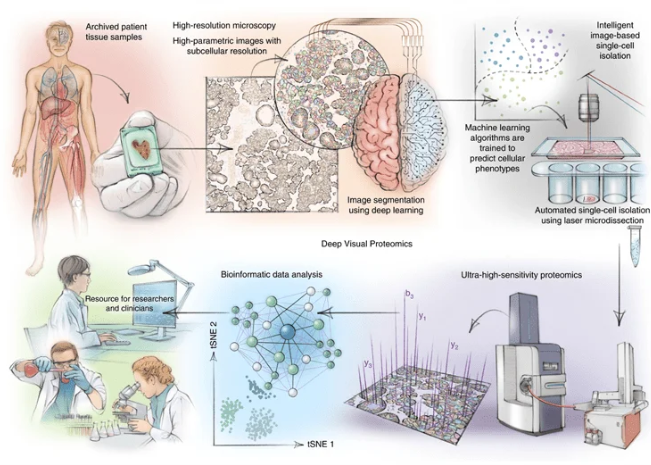

Source: https://www.news-medical.net/news/20220522/Deep-visual-proteomics-is-redefining-cancer-diagnostics.aspxhttps


Uma vez sequenciado, um tumor cancerígeno pode ter milhares de  mutações genéticas. **O desafio é distinguir as mutações que contribuem para o  crescimento do tumor das mutações.Atualmente, esta interpretação de mutações genéticas está sendo feita  manualmente. Esta é uma tarefa muito demorada, onde um patologista clínico tem  que revisar manualmente e classificar cada mutação genética com base em  evidências da literatura clínica baseada em texto.**

Portanto, para este projeto (competição), o MSKCC <a href="https://www.mskcc.org/">(Memorial Sloan Kettering Cancer Center) </a> está  disponibilizando uma base de conhecimento anotada por especialistas, onde **pesquisadores e oncologistas de nível mundial anotaram manualmente milhares  de mutações. O dataset completo pode ser encontrado em:**

https://www.kaggle.com/c/msk-redefining-cancer-treatment/data

NIPS 2017 Competition Track https://nips.cc/Conferences/2017/CompetitionTrack

---

**Organizadores**

- Iker Huerga, huergasi@mskcc.org

- Alexander Grigorenko, grigorea@mskcc.org

- Anasuya Das, dasa@mskcc.org Leifur

- Thorbergsson, thorberl@mskcc.org

**Coordenadores da competição**

- Kyla Nemitx, nemitzk@mskcc.org

- Randi Kaplan, kaplanr@mskcc.org

- Jenna Sandker, muchaj@mskcc.org 



---

### Objetivo 

---
Objetivo é  desenvolver **um modelo (algoritmo) de classificação que analisem resumos de artigos médicos** e, <mark>com base em seu conteúdo, determinem com precisão a oncogenicidade (4 classes) e o efeito de mutação (9 classes) dos genes neles discutidos</mark>.O algoritmo precisa classificar as mutações genéticas com base em evidências clínicas baseada em artigos (textos científicos médicos).Ou seja, o resultado alcançado do <mark>modelo ajudará os especialistas a acelerar significativamente suas pesquisas.</mark>

---

### File descriptions

Ambos os files, treinamento e teste, os conjuntos de dados são fornecidos por meio de dois arquivos diferentes. Um **(training/test_variants)** fornece as informações sobre as mutações genéticas, enquanto o outro **(training/test_text)** fornece a evidência clínica (texto) que nossos especialistas humanos usaram para classificar as mutações genéticas. Ambos são vinculados por meio do campo ID.

--- 

**training_variants**

É Um arquivo **separado por vírgulas** contendo a descrição das mutações genéticas usadas para treinamento, os atribuitos são: 

+ **Os campos são ID**: o id da linha usada para vincular a mutação à evidência clínica.
+ **Gene**: o gene onde essa mutação genética está localizada.
+ **Variation**: a alteração de aminoácidos para essas mutações.
+ **Class**: 1 - 9 a classe desta mutação genética foi classificada.

**test_variants**

É um arquivo separado por vírgulas contendo a descrição das mutações genéticas usadas para treinamento. 

+ **Os campos são ID**: o id da linha usada para vincular a mutação à evidência clínica.
+ **Gene**: o gene onde essa mutação genética está localizada.
+ **Variation**: a alteração de aminoácidos para essas mutações.

--- 

**training_text**

É um arquivo delimitado por **barra dupla (||)** que contém a evidência clínica (texto) usada para classificar mutações genéticas. 

+ Os campos são ID (o id da linha usada para vincular a evidência clínica à mutação genética).

+ Texto (a evidência clínica usada para classificar a mutação genética).


**test_text**

É um arquivo com delimitado definido polr barra dupla (||) que contém a evidência clínica (texto) usada para classificar mutações genéticas. 

+ Os campos são ID (o id da linha usada para vincular a evidência clínica à mutação genética)
+ Texto (a evidência clínica usada para classificar a mutação genética)

--- 

**submitSample**

- É arquivo de envio de amostra no formato correto

### <center> Métricas e Resultados Alcançados</center>

###  Modelo implementado com a Biblioteca Keras - Memória Bidirecional de Longo Prazo (Bi-LSTM)

---

De acordo com gráfico, o modelo Bi-LSTM atingiu a menor perda em apenas 6 épocas abaixo de ~ 1.2. Em seguida as figuras ilustra as métricas do modelo em dados de teste.


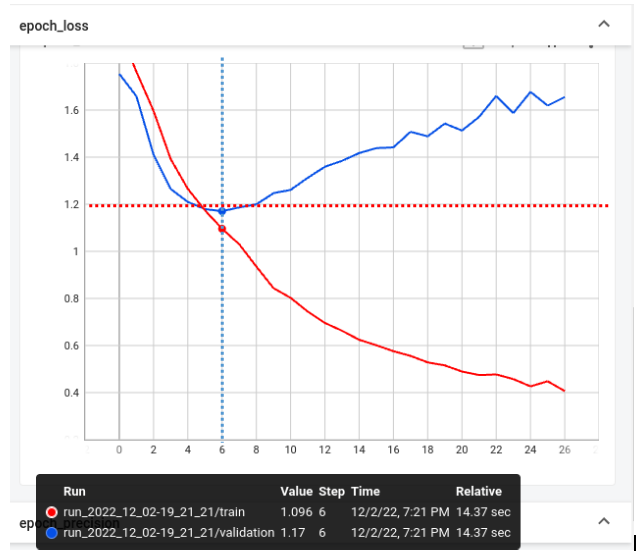


--- 
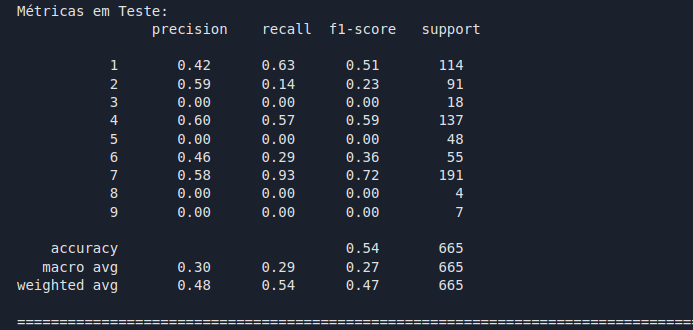
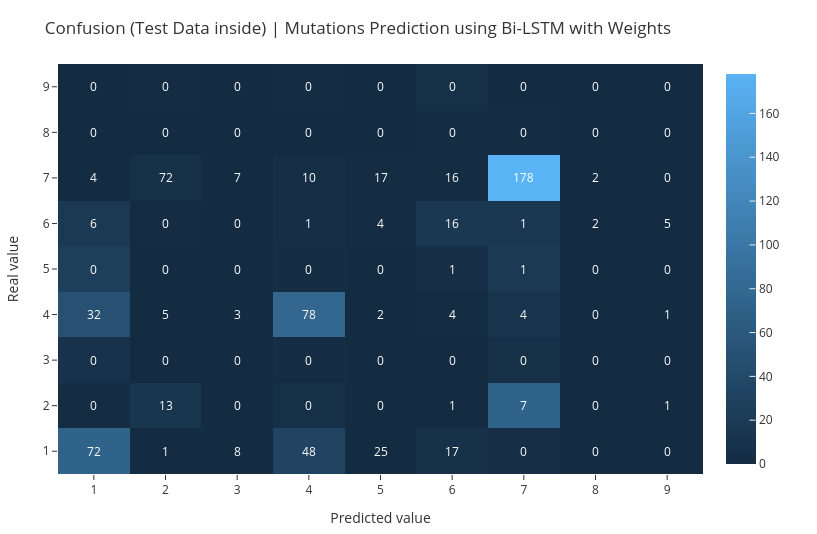


---

Assim, a partir desse momento, entraremos em detalhes técnicos à medida que o projeto desenvolveu suas técnicas analíticas e os resultados alcançados.

### Instalando e Carregando os Pacotes e Bibliotecas

### Bibliotecas usadas

Este projeto usa várias bibliotecas. Isso pode ser bom ou ruim. Algumas dessas bibliotecas podem ser difíceis de instalar ou podem entrar em conflito com versões de outras bibliotecas

Existem duas opções principais para instalar bibliotecas em Python. Uma delas é usa pip (um acrônimo para Pip Installs Python, ou Pip installs Python), uma ferramenta que vem com o Python e a outra opção é usar o Anaconda (https://anaconda.org).

Iniciamos um importante projeto com todas as bibliotecas necessárias para atingir objetivos desejados.

In [2]:
# Importando biliotecas necessárias para Manipulação dos Sistema Operacional e Python
import os,sys,psutil, platform
from platform import python_version

# Importando bibliotecas necessárias para a plotagem matplotlib e Seaborn
%matplotlib inline

# Importando bibliotecas necessárias para a plotagem de gráficos interativos com o plotly.
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode

#renderização dos gráficos no jupyterlab
import plotly.io as pio
pio.renderers.default = 'iframe'
pio.renderers.default = 'iframe_connected'
pio.renderers.default = 'colab'
pio.renderers.default = "png"

# Importando biblioteca para a manipulação e exploração dos conjuntos de dados.
import numpy as np
import pandas as pd 
from pandas_profiling import ProfileReport

# Importando módulos embutidos, collections
from collections import Counter

# Import módulos para cálculos matemáticos
import math

# Importando bibliotecas necessárias para manipulação tempo
import timeit
from time import time
from datetime import datetime


# Importando bibliotecas para redução dimensionalidade
from sklearn.decomposition import PCA, TruncatedSVD

# Importando biblioteca para avaliação da performance do modelo e divisão 
from sklearn.model_selection import (
    cross_val_score, 
    train_test_split,
    KFold, StratifiedKFold
)

# Importando classes, para calcular as métricas de avaliação dos modelos preditivos.
from yellowbrick.classifier import (
    ClassBalance,
    ClassificationReport,
    ClassPredictionError,
    confusion_matrix,
    DiscriminationThreshold,
    PrecisionRecallCurve,
    ROCAUC
)

from sklearn.metrics import(
    auc,accuracy_score,
    classification_report,
    confusion_matrix,
    recall_score,precision_score,f1_score,
    roc_auc_score,
    roc_curve,
)
# Para ocultar Future Warnings.
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# A configuração de quantas linhas  e colunas que serão  mostradas
from IPython.display import display
#pd.options.display.max_rows =None

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth',False)# para check todo o conteúdo inteiro da coluna

In [3]:
# Versões dos pacotes usados neste jupyter notebook

# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark
print('*'*65)

%reload_ext watermark
%watermark -a "Helber l Figueredo" --iversions

# Versão da Linguagem Python
print('\nPython Language Version Used In This Jupyter Notebook:', python_version())

date =datetime.today().strftime('Date %d/%m/%Y')
print(f"Projeto Compilado em {date}")

*****************************************************************
Author: Helber l Figueredo

matplotlib: 3.1.1
pandas    : 1.3.4
seaborn   : 0.11.2
plotly    : 5.6.0
psutil    : 5.8.0
numpy     : 1.21.6
sys       : 3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]
platform  : 1.0.8


Python Language Version Used In This Jupyter Notebook: 3.9.7
Projeto Compilado em Date 02/12/2022


### Hardware and system information
<mark><a href ="https://www.thepythoncode.com/article/get-hardware-system-information-python">code</a></mark>

In [4]:
def get_size(bytes, suffix="B"):
    """
    Scale bytes to its proper format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
        
# System Information
print("="*40, "System Information", "="*40)
uname = platform.uname()
print(f"System: {uname.system}")
print(f"Release: {uname.release}")
print(f"Version: {uname.version}")
print(f"Machine: {uname.machine}")

# let's print CPU information
print("="*40, "CPU Info", "="*40)
# number of cores
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))
# CPU frequencies
cpufreq = psutil.cpu_freq()

print(f"Max Frequency: {cpufreq.max:.2f}Mhz")
print(f"Min Frequency: {cpufreq.min:.2f}Mhz")

# Memory Information
print("="*40, "Memory Information", "="*40)

# get the memory details
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}")


======================================== System Information ========================================
System: Linux
Release: 5.15.0-53-generic
Version: #59~20.04.1-Ubuntu SMP Thu Oct 20 15:10:22 UTC 2022
Machine: x86_64
======================================== CPU Info ========================================
Physical cores: 6
Total cores: 12
Max Frequency: 4800.00Mhz
Min Frequency: 800.00Mhz
======================================== Memory Information ========================================
Total: 31.20GB


### Exploratory Data Analysis

### Leitura dados de Train/Test

In [5]:
# Loading the data train with pandas

# Marca o início
start = datetime.now()

#dados do tipo csv
full_train = pd.read_csv('data_files/training_variants')
full_test = pd.read_csv('data_files/test_variants')

print("Data loading time: ",datetime.now() - start)

Data loading time:  0:00:00.030271


In [6]:
# Conferindo as dimensões do conjunto de dados de train 
print('Number of data points:', full_train.shape[0])
print('Number of features:', full_train.shape[1])
# checando se há valores missing em único valor booleano and  o número de registros duplicados.
print(f'Values missing: {full_train.isna().any().any()}\nValues duplicated: {full_train.duplicated().sum()}')
print('Features:', full_train.columns.values)
full_train.head()

Number of data points: 3321
Number of features: 4
Values missing: False
Values duplicated: 0
Features: ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [7]:
# Conferindo as dimensões do conjunto de dados de test
print('Number of data rows:', full_test.shape[0])
print('Number of features:', full_test.shape[1])
# checando se há valores missing em único valor booleano and  o número de registros duplicados.
print(f'Values missing: {full_test.isna().any().any()}\nValues duplicated: {full_test.duplicated().sum()}')
print('Features:', full_test.columns.values)
full_test.head()

Number of data rows: 5668
Number of features: 3
Values missing: False
Values duplicated: 0
Features: ['ID' 'Gene' 'Variation']


,ID,Gene,Variation
0,0,ACSL4,R570S
1,1,NAGLU,P521L
2,2,PAH,L333F
3,3,ING1,A148D
4,4,TMEM216,G77A


### Analisando o balanceamento das Mutações Genéticas (variável Target)

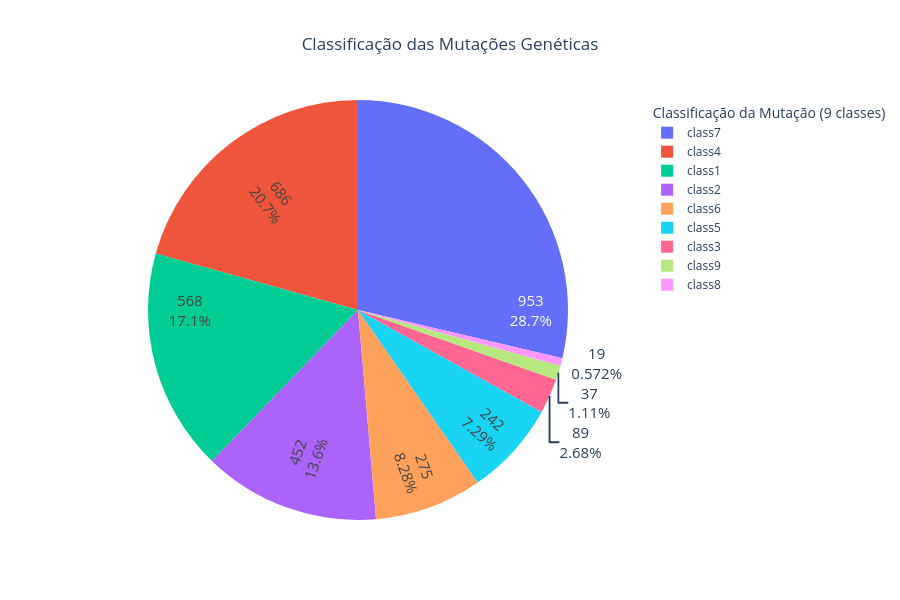

In [8]:
# Cria a figura
fig = go.Figure([go.Pie(labels = full_train['Class'].replace([1,2,3,4,5,6,7,8,9], 
                                                              ["class1", "class2","class3","class4",
                                                               "class5", "class6","class7","class8","class9"]))])

# Interatividade
fig.update_traces(hoverinfo = 'label+percent', 
                  textinfo = 'value+percent', 
                  textfont_size = 15,
                  insidetextorientation = 'radial')

# Layout
fig.update_layout(title = "Classificação das Mutações Genéticas", title_x = 0.5,
                 legend_title_text=' Classificação da Mutação (9 classes)',
                  width = 900,
                  height=600,
                 template='plotly_white')

# Gráfico
fig.show()

### Finding Unique Values


**Unique e value_counts** são úteis para manipular e explorar colunas categóricas. Muitas vezes, em colunas categóricas, haverá classes que precisam ser tratadas na fase de manipulação de dados.

Verificando as variáveis categóricas como **únicas** sobre seus limites por categorias, ou seja,  se queremos simplesmente contar o número de valores únicos, podemos usar **nunique:**

In [9]:
# selecionando as variáveis e seu type object
info = full_train.select_dtypes(include="object")

# Contabilizando o número de valores únicos, em cada variável do type object do dataset.
info = info.nunique().sort_values()

# Determinando o tipo de dado, de cada uma das variáveis, do dataset de treino.

info = pd.DataFrame(info , columns = ['NUniques'])

# Atribuindo informações, sobre o tipo de dado das variáveis, ao DataFrame.

info['dtypes'] =full_train.dtypes

# Exibindo DataFrame.
print(info)
print('-'*100)
full_train.groupby('Class').describe()

           NUniques  dtypes
Gene            264  object
Variation      2996  object
----------------------------------------------------------------------------------------------------


ID                                                             \
       count         mean          std    min      25%     50%      75%   
Class                                                                     
1      568.0  1431.561620   950.721629    0.0   542.75  1265.0  2280.25   
2      452.0  1644.789823  1055.856113    1.0   840.75  1442.5  2745.50   
3       89.0  1645.191011   772.938547    3.0   975.00  1650.0  2224.00   
4      686.0  1440.048105   891.106100    4.0   622.50  1575.5  2209.75   
5      242.0  2026.157025   817.487914    6.0  1412.25  2467.5  2637.50   
6      275.0  2163.410909   831.190933   20.0  1434.00  2484.0  2817.50   
7      953.0  1755.014690   948.957122   28.0  1059.00  1670.0  2708.00   
8       19.0  1554.684211   973.636200  121.0   529.00  1768.0  2276.00   
9       37.0   936.675676   790.795277  122.0   131.00  1083.0  1751.00   

               
          max  
Class          
1      3318.0  
2      3290.0  
3      3255.0  
4      3320.0  
5      3289.0  
6      3314.0  
7      3310.0  
8      3114.0  
9      3061.0

Na análise categórica, observando que temos **294** valores únicos para variável Gene e  a Variation temos **2.996** valores únicos.

---

Com base na análise anterior, podemos verifica quais são genes e variations que tem as maiores predominação no conjunto de dados

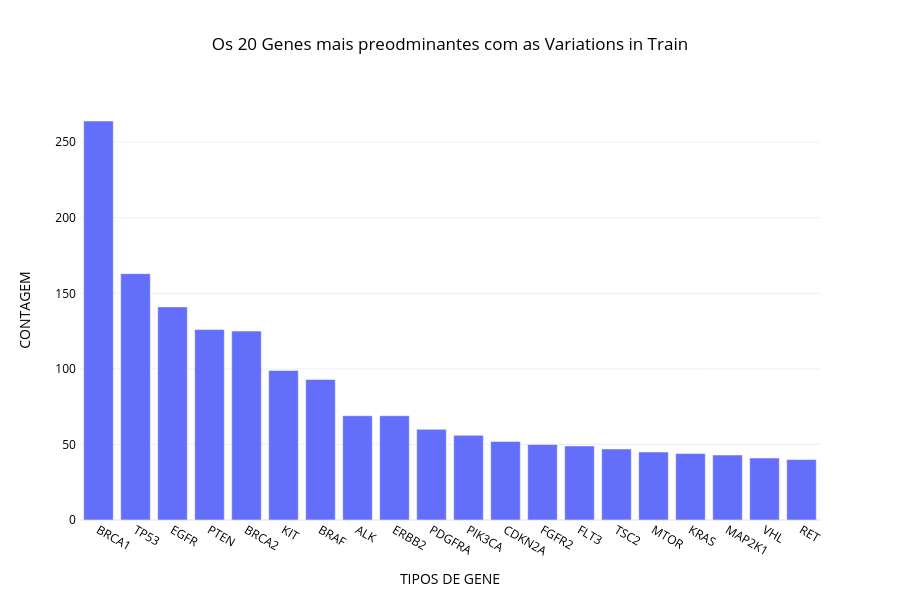

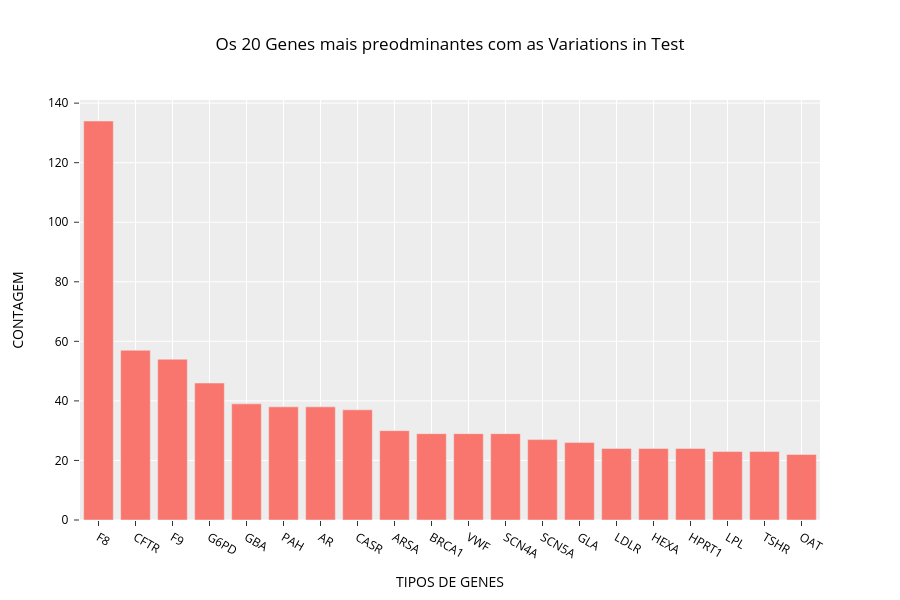

In [10]:
# Agrupamento por Genes em train
gv=full_train.groupby(['Gene'])['Variation'].count().reset_index().sort_values('Variation',ascending=False).head(20)

# Agrupamento por Gene em teste
gvt=full_test.groupby(['Gene'])['Variation'].count().reset_index().sort_values('Variation',ascending=False).head(20)


# Cria a figura 
fig = go.Figure(go.Bar(y = gv['Variation'], x = gv['Gene'],orientation = "v")) 

# Layout
fig.update_layout(title_text = 'Os 20 Genes mais preodminantes com as Variations in Train',
                  title_x =0.5,
                  width = 900,
                  height = 600,
                  font_color ="black",
                  xaxis_title = "TIPOS DE GENE", 
                  yaxis_title = "CONTAGEM ",
                  template ="plotly_white")

fig.update_yaxes(ticksuffix = " ")

# Mostra o gráfico
fig.show()

# Cria a figura
fig = go.Figure(go.Bar(y = gvt['Variation'], x = gvt['Gene'],orientation = "v")) 

# Layout
fig.update_layout(title_text = 'Os 20 Genes mais preodminantes com as Variations in Test',
                  title_x =0.5,
                  height = 600,
                  width = 900,
                  font_color ="black",
                  xaxis_title = "TIPOS DE GENES", 
                  yaxis_title = "CONTAGEM ",
                  template ="ggplot2")

fig.update_yaxes(ticksuffix = " ")

# Mostra o gráfico
fig.show()

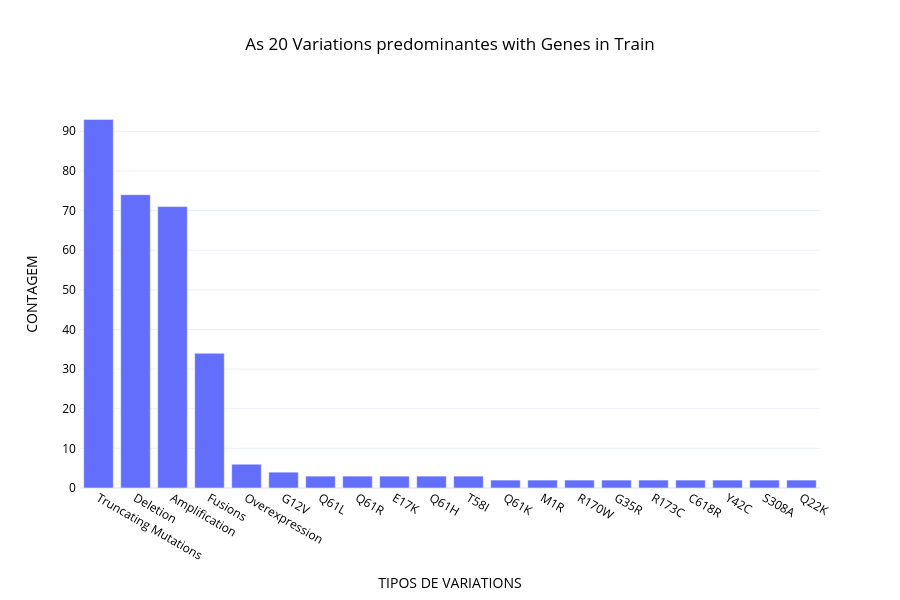

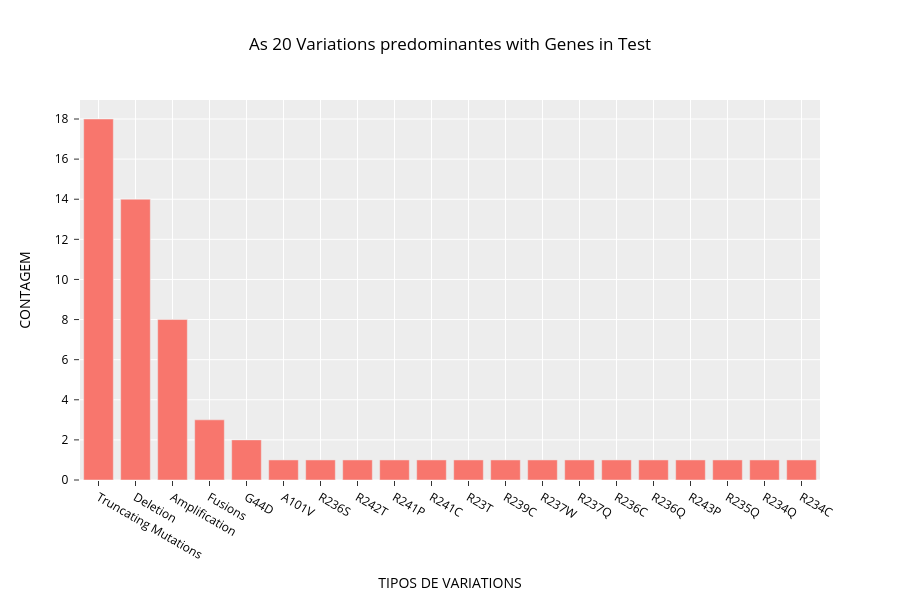

In [11]:
# Agrupamento por Variation in train
vg=full_train.groupby(['Variation'])['Gene'].count().reset_index().sort_values('Gene',ascending=False).head(20)

# Agrupamento por Variation in teste
vgt=full_test.groupby(['Variation'])['Gene'].count().reset_index().sort_values('Gene',ascending=False).head(20)

# Cria a figura 
fig = go.Figure(go.Bar(y = vg['Gene'], x = vg['Variation'],orientation = "v")) 

# Layout
fig.update_layout(title_text = 'As 20 Variations predominantes with Genes in Train',
                  title_x =0.5,
                  height = 600,
                  width = 900,
                  font_color ="black",
                  xaxis_title = "TIPOS DE VARIATIONS", 
                  yaxis_title = "CONTAGEM",
                  template ="plotly_white")

fig.update_yaxes(ticksuffix = " ")
# Mostra o gráfico
fig.show()


# Cria a figura
fig = go.Figure(go.Bar(y = vgt['Gene'], x = vgt['Variation'],orientation = "v")) 

# Layout
fig.update_layout(title_text = 'As 20 Variations predominantes with Genes in Test',
                  title_x =0.5,
                  width = 900,
                  height = 600,
                  font_color ="black",
                  xaxis_title = "TIPOS DE VARIATIONS", 
                  yaxis_title = "CONTAGEM",
                  template ="ggplot2")

fig.update_yaxes(ticksuffix = " ")
# Mostra o gráfico
fig.show()

### Leitura dados Train/test of type Text

In [12]:
# Observe o separador neste arquivo
train_text =pd.read_csv("data_files/training_text",
                       sep="\|\|",
                       engine="python",
                       names=["ID","TEXT"],
                       skiprows=1)


print('Row numbers in the dataset: ', train_text.shape[0])
print('Number of features : ', train_text.shape[1])
print('Features : ', train_text.columns.values)
train_text.head()

Row numbers in the dataset:  139
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [13]:
# Observe o separador neste arquivo
test_text =pd.read_csv("data_files/test_text",
                       sep="\|\|",
                       engine="python",
                       names=["ID","TEXT"],
                       skiprows=1)


print('Row numbers in the dataset: ', test_text.shape[0])
print('Number of features : ', test_text.shape[1])
print('Features : ', test_text.columns.values)
test_text.head()

Row numbers in the dataset:  139
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


### 4.5. Merge Datasets

Existem diversas maneiras de realizar a junção de datasets um resumo padrão é:

- join é uma junção a esquerda
- pd.merge de coluna é uma junção interna de coluna
- pd.concat uma junção externa de linha

Além disso, é importante observa que as dimensões dos dados de train/test tem as mesmas dimensões isso facilita as junções.

https://stackoverflow.com/questions/38256104/differences-between-merge-and-concat-in-pandas
https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index/40468090#40468090

--- 
Coletamos as informações sobre as mutações em genes com base nas informações em artigo científico médicos

In [14]:
# Merge in Test
df_merge = pd.merge(full_train, train_text, how = 'left', on = 'ID')
df_merge.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [15]:
# check onde há valores NAN
df_merge[df_merge.isnull().any(axis=1)].head()

,ID,Gene,Variation,Class,TEXT
139,139,EGFR,S752_I759del,2,NaN
140,140,EGFR,I491M,5,NaN
141,141,EGFR,D770_P772dup,7,NaN
142,142,EGFR,G719A,7,NaN
143,143,EGFR,G735S,7,NaN


In [16]:
# Preecnha valores NAN no text pela junção de Gene e Variation
df_merge.loc[df_merge['TEXT'].isnull(),'TEXT'] = df_merge['Gene'] + ' ' + df_merge['Variation']

# filtragem 
df_merge[df_merge['ID']==139]

,ID,Gene,Variation,Class,TEXT
139,139,EGFR,S752_I759del,2,EGFR S752_I759del


### Text preprocessing

In [17]:
# Importando módulos para pré-processamento de texto
import re
import spacy
import string
import nltk

#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


# Importando biblotecas TensorFlow e Keras
import tensorflow as tf
import tensorflow.keras as keras
import keras.backend as K
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, LSTM
from tensorflow.python.keras.utils import  losses_utils

# A kerasTuner HyperModel
import keras_tuner as kt

# Importando a barra de progresso método de visualização do resultados
from tqdm.keras import TqdmCallback

#TensorFlow e a keras  versões:
print('TensorFlow version:',tf.__version__)
print('Keras version:', keras.__version__)

2022-12-02 16:39:30.212646: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-02 16:39:30.212901: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-02 16:39:30.212918: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rogstrixb460g): /proc/driver/nvidia/version does not exist


TensorFlow version: 2.8.0
Keras version: 2.8.0


In [18]:
# Carregando StopWords e PorterStemmer da biblioteca nltk
STOPWORDS= set(stopwords.words('english'))
PORTER_STEMMER = PorterStemmer()

### Data preparation

In [19]:
#convert column names to lowercase
df_merge.columns = df_merge.columns.str.lower()
df_merge.head()

,id,gene,variation,class,text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


#### Remoção de stopwords

Stopwords são palavras comuns que normalmente não contribuem para o significado de uma frase, pelo menos com relação ao propósito da informação e do processamento da linguagem natural. São palavras como "The" e "a" ((em inglês) ou "O/A" e "Um/Uma" ((em português). Muitos mecanismos de busca filtram estas palavras (stopwords), como forma de economizar espaço em seus índices de pesquisa.

Essas listas de palavras irrelevantes já estão compiladas para diferentes idiomas e podemos usá-las com segurança. Por exemplo, a lista de palavras irrelevantes para o idioma inglês do pacote nltk pode ser vista abaixo.

**Em poucas palavras a StopWords é  uma palavra que se for removida de uma frase, ela não perde o sentido.**

In [20]:
def preprocess_text(text):
    filtered_text = []
    if type(text) is not int:
        string = ""
        #substitua cada caractere especial por espaço
        text = re.sub('[^a-zA-Z0-9\n]', ' ', text)
        # Substitui vários espaços por um único espaço
        text= re.sub('\s+','  ', text)
        # Convertendo todos os caracteres em letras minúsculas
        text = text.lower()
        for each_word in word_tokenize(text):
        #Se a palavra não for uma stop words, retenha essa palavra dos dados
            if not each_word in STOPWORDS:
                string += each_word + " "
                filtered_text.append(each_word)
    return " ".join(filtered_text)

# Chamada da function
df_merge['text'] = df_merge.text.apply(preprocess_text)

In [21]:
# Obtém coluna número do comprimento (caracteres) de coluna para cada linha do texto
df_merge['text_length_wo_stop'] = df_merge['text'].apply(len)

# Contagem de palavras
df_merge["text_num_words_wo_stop"] = df_merge["text"].apply(lambda x: len(str(x).split()) )

In [22]:
# Verifique se há valores ausentes e valores duplicados
print(
    "\n-- verifique os valores ausentes nos dados --\n{}".format(
        df_merge.isnull().any()
    )
)
print("\n-- verificar valores duplicados dados --\n{}".format(df_merge.duplicated().any()))


-- verifique os valores ausentes nos dados --
id                        False
gene                      False
variation                 False
class                     False
text                      False
text_length_wo_stop       False
text_num_words_wo_stop    False
dtype: bool

-- verificar valores duplicados dados --
False


### Overview
Dessa forma, usaremos uma visualização mais sofisticada  para obter uma visão completa do conjunto, é por meio da biblioteca **pandas-profiling** inclui um relatório de perfil. É possível gerar esse relatório em um notebook.<mark>Dessa forma, esse relatório sintetizará os tipos das colunas e permitirá que você visualize os detalhes das estatísticas dos quantis, as estatísticas descritivas, histogramax, os valores comuns e os valores extremos (outliers).</mark>

In [23]:
# create um relatório de perfil 
profile = ProfileReport(df_merge, title="Pandas Profiling Report")

#chamada do objeto do função
#profile.to_notebook_iframe()

In [24]:
# gerando relatório externo via html
profile.to_file("report/df_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Como determinar o comprimento da sequência da frase

De certo, para treinar um modelo **redes neurais recorrentes (RNNs)**  usando a camada embeddings do keras, é preciso padronizar o comprimento do texto de entrada. Por isso, analisei os comprimentos das amostras traçando um histograma do número de palavras em cada amostra. Em média, a maior parte   da sequência de palavras está entre 0 a 199 (neste intervalo) contém cerca de 3200 palavras de acordo com os gráficos a seguir, onde-se concetra a maior distribuição de palavras.Dessa maneira, capturamos sequência de palavras ideal, ou seja, definimos o número máximo de palavras em cada sequência do texto específico do artigo científico em 200, será descrito nas seções subsequentes todo esse procedimento.

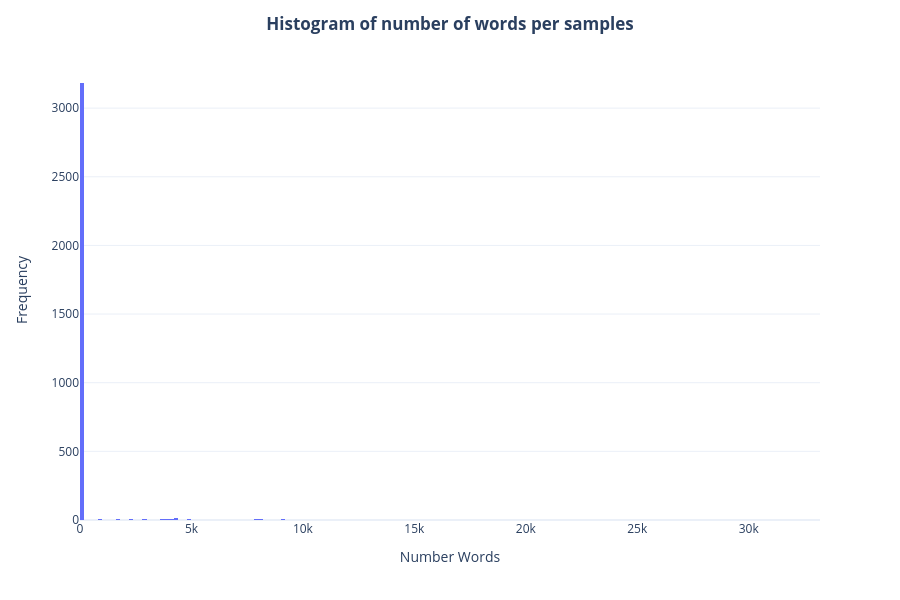

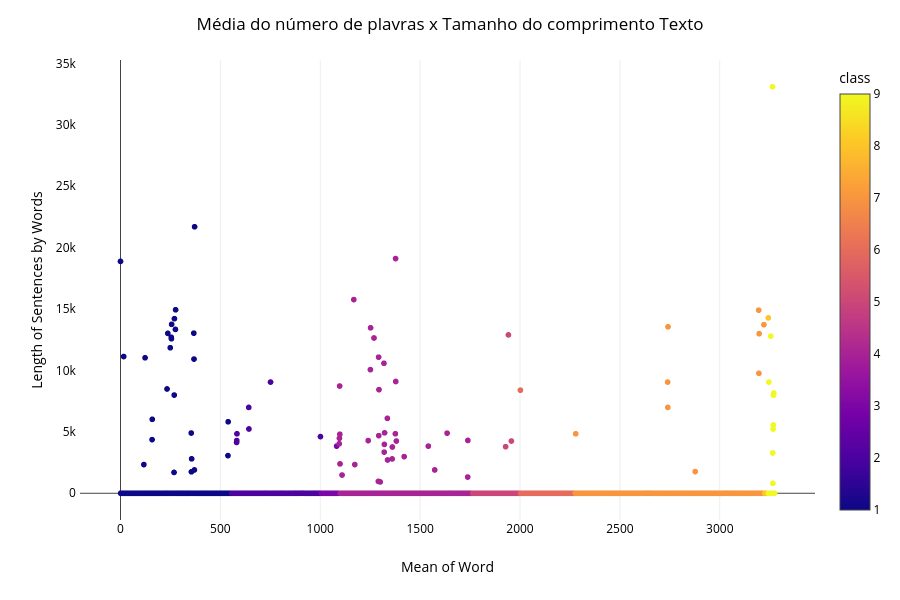

In [25]:
# configura área de plotagem
fig = px.histogram(
    x=df_merge.text_num_words_wo_stop,
    template='plotly_white'
)
fig.update_layout(
    title={
        'text': "<b>Histogram of number of words per samples</b>",
        'x': 0.5,
        'xanchor': 'center'
    })
fig.update_yaxes(title='Frequency').update_xaxes(
    title='Number Words')
fig.update_layout(showlegend=False,width = 900,height = 600)
fig.update_layout(hovermode='x')
# Mostra o gráfico
fig.show()


# Agrupamento por class and text
words_max =df_merge.groupby(['class','text'])['text_num_words_wo_stop'].mean().reset_index()

# Cria a figura 
fig = px.scatter(words_max, y="text_num_words_wo_stop", color='class')

# Layout
fig.update_layout(title_text = 'Média do número de plavras x Tamanho do comprimento Texto',
                  title_x =0.5,
                  width = 900,
                  height = 600,
                  font_color ="black",
                  xaxis_title = "Mean of Word", 
                  yaxis_title = "Length of Sentences by Words",
                  template ="ygridoff")

fig.update_yaxes(ticksuffix = " ")
# Mostra o gráfico
fig.show()

In [26]:
# junção por Gene e Variation para forma uma novo texto
df_merge['new_text'] = df_merge['gene'] + ' ' + df_merge['variation']

# Chamada da function
df_merge['new_text'] = df_merge.new_text.apply(preprocess_text)

# Contagem de palavras
df_merge["text_num_words"] = df_merge["new_text"].apply(lambda x: len(str(x).split()) )

# show dataset
df_merge.head()

,id,gene,variation,class,text,text_length_wo_stop,text_num_words_wo_stop,new_text,text_num_words
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...,30821,4368,fam58a truncating mutations,3
1,1,CBL,W802*,2,abstract background non small cell lung cancer...,27843,4139,cbl w802,2
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...,27843,4139,cbl q249e,2
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...,28085,3840,cbl n454d,2
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...,31648,4254,cbl l399v,2


In [27]:
# criando novo report com pandas profiling
profile = ProfileReport(df_merge, title="Pandas Profiling Report")

#chamada do objeto do função
#profile.to_notebook_iframe()

# gerando relatório externo via html
profile.to_file("report/df_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

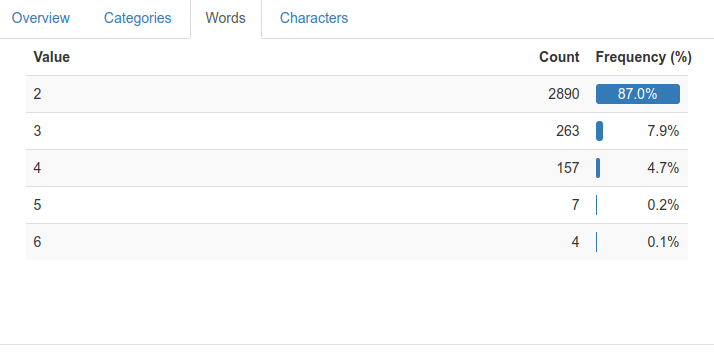


Nesta análise, a maioria das amostras contém cerca de 6 palavras, destaca-se que a maior freq de palavras está na contagem de duas palavras com cerca 87% de freq, os gráficos a seguir simplifica esta análise

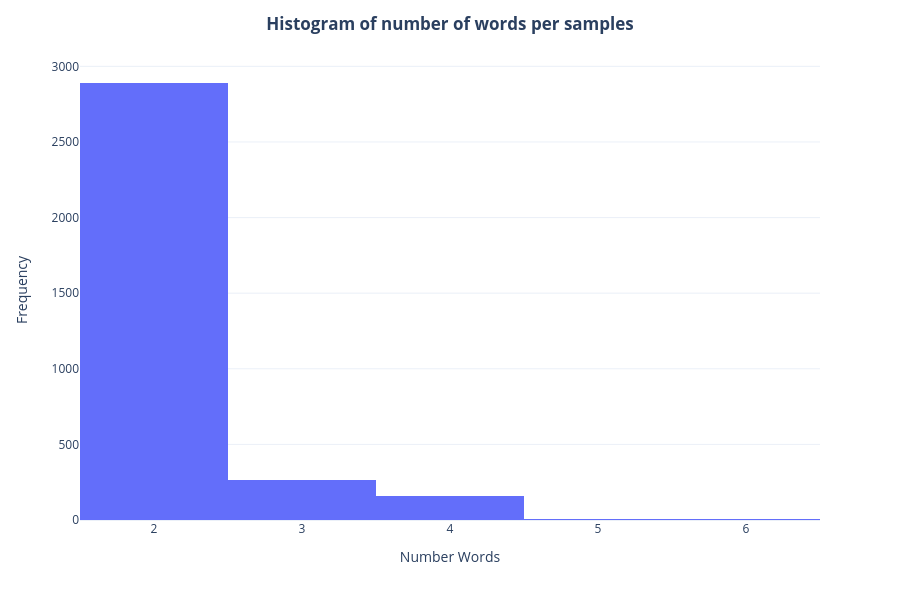

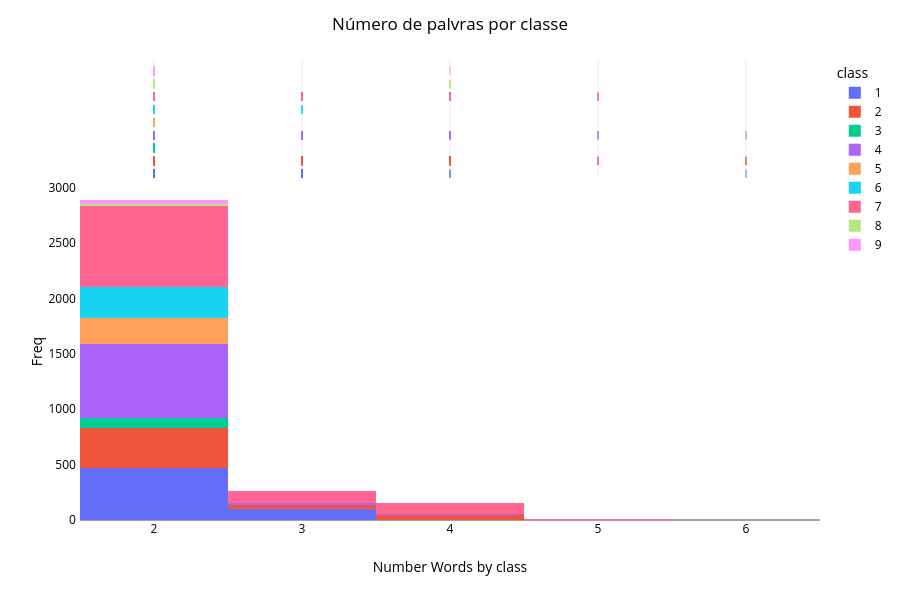

In [28]:
# configura área de plotagem
fig = px.histogram(
    x=df_merge.text_num_words,
    template='plotly_white'
)
fig.update_layout(
    title={
        'text': "<b>Histogram of number of words per samples</b>",
        'x': 0.5,
        'xanchor': 'center'
    })
fig.update_yaxes(title='Frequency').update_xaxes(
    title='Number Words')
fig.update_layout(showlegend=False,width = 900,height = 600)
fig.update_layout(hovermode='x')
# Mostra o gráfico
fig.show()


# Agrupamento por class and text
words_max2 =df_merge.groupby(['class','new_text'])['text_num_words'].mean().reset_index()

# Cria a figura 
fig = px.histogram(words_max2, x="text_num_words", color='class',marginal="rug")

# Layout
fig.update_layout(title_text = 'Número de palvras por classe',
                  title_x =0.5,
                  width = 900,
                  height = 600,
                  font_color ="black",
                  xaxis_title = "Number Words by class", 
                  yaxis_title = "Freq",
                  template ="ygridoff")

fig.update_yaxes(ticksuffix = " ")
# Mostra o gráfico
fig.show()

In [29]:
# fatiamento do dataset
train = df_merge.iloc[:,[0,1,2,3,7]]

# salvando o file
train.to_csv("data_files/train.csv",index = False,header=True, sep=',',encoding = 'utf-8')

## <center>Predictive modeling<center>

#### Declarando vetor de recursos e a variável de destino

In [30]:
train_text, train_labels = df_merge['new_text'],tf.keras.utils.to_categorical(df_merge["class"], num_classes=10)
train_text_sparse, train_labels_sparse = df_merge['new_text'],df_merge['class'].ravel()
# Check the shape of whole dataset and the splited training and test set
print("--Shape of the whole data--\n {}".format(train_text.shape))
print("\n--Shape of the target vector--\n {}".format(train_labels.shape))

--Shape of the whole data--
 (3321,)

--Shape of the target vector--
 (3321, 10)


In [31]:
# Para fazer o caminho inverso, usamos a função np.argmax() com axis=1.
def get_labels_from_oh_code(oh_code):
    
    '''Aceita matriz codificada one-hot Retorna uma lista de categorias decodificadas'''
    
    label_code = np.argmax(oh_code, axis=1)
#   print(label_code)
    label = df_merge['class'][label_code]
#   print(list(label))
    return list(label)

In [32]:
total_data = ' '.join(list(train_text))
len(set(word_tokenize(total_data))) # vocab size

3320

### Train/Validadtion/Test  Split

Como todos sabemos, as máquinas podem processar e armazenar conhecimento*. E elas são  muito mais rápidos do que os humanos. Mas como podemos maximizar o uso das máquinas  e permitir que elas realizem algumas <font color="red">"tarefas inteligentes"?</font> A resposta a esta pergunta é, para usar os dados que relacionado com essas tarefas inteligentes.Assim, deixar a máquinas  aprender a partir dos dados. Esses dados relacionados também são chamados de dados de **treinamento**.

---

- **Conjunto de Treinamento**:
É o conjunto de dados usado para treinar e fazer o modelo aprender os recursos / padrões ocultos nos dados.O modelo vê e aprende com esses dados,ou seja usados para treinar algoritmos de aprendizado de máquina e melhorando  a precisão.

---
- **Conjunto de Teste**: Cada modelo de aprendizado de máquina precisa ser testado no mundo real quanto à sua precisão ao encontrar novos dados. Assim como um aluno encontra uma questão invisível em um exame. A máquina também precisa de um teste,é usado para estimar o desempenho de algoritmos de aprendizado de máquina quando eles são usados para fazer previsões sobre dados não usados para treinar o modelo.

---
- **Conjunto de  validação**: O conjunto de validação, na verdade, pode ser considerado parte do conjunto de treinamento, porque é usado para construir seu modelo, redes neurais ou outros. Geralmente é usado para seleção de parâmetro e para evitar sobreajuste.O conjunto de validação é usado para ajustar os parâmetros de um modelo. O conjunto de teste é usado para avaliação de desempenho.

>>> **<font color="#f000"> O set de treinamento é usado para criar o modelo, enquanto o set de validação é usado para ajustar o desempenho e set teste é usado para avaliar o modelo final o quão bem ele prever novos dados.</font>**

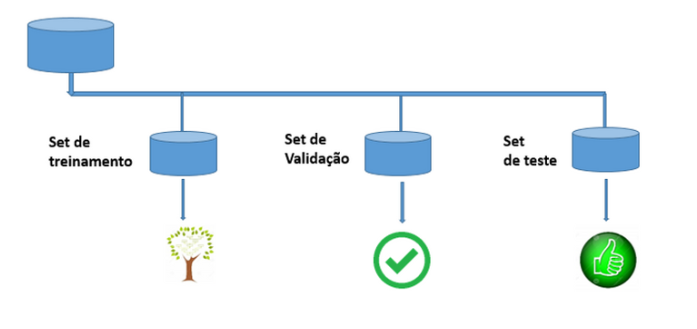

<center>Image source: MICHEL</center>

---
É importante analisar, os conjuntos de treinamento e teste são fáceis de entender. **A razão pela qual queremos
ter um conjunto de dados de validação adicional é evitar expor o algoritmo a todos os dados de treinamento durante os estágios de ajuste - isso aumenta a capacidade de generalização do resultado final do modelo para dados não vistos. Se não tivermos um conjunto de validação, o melhor modelo selecionado no estágio de ajuste seria aquele que se concentra em extrair quaisquer recursos sutis no dados de treinamento para aumentar incessantemente a precisão do treinamento sem se preocupar com nenhum conjunto de dados invisível (QINGQUAN SONG; HAIFENG JIN; XIA HU, 2022).**

Assim sendo, esta situação provavelmente levará a um desempenho ruim no teste final
conjunto, que contém dados diferentes. Quando o modelo tem um desempenho pior no conjunto de teste
(ou conjunto de validação) do que o conjunto de treinamento, isso é chamado de overfitting. É um problema bem conhecido em ML e geralmente acontece quando a capacidade de aprendizado do modelo é muito forte eo tamanho do conjunto de dados de treinamento é limitado (QINGQUAN SONG; HAIFENG JIN; XIA HU, 2022).


- **Do  mesmo modo, é importante destaca como configurar a divisão dados treino, validação e teste**: O procedimento tem um parâmetro de configuração principal, que é o tamanho do treino e dos conjuntos de teste. Isso é mais comumente expresso como uma porcentagem entre 0 e 1 para o treino ou conjuntos de dados de teste. Por exemplo, um conjunto de treinamento com o tamanho de 0,67 (67%) significa que a porcentagem restante 0,33 (33%) é atribuída ao conjunto de teste.

>Não há porcentagem de divisão ideal.

Você deve escolher uma porcentagem de divisão que atenda aos objetivos do seu projeto com considerações que incluem:

+ Custo computacional no treinamento do modelo.
+ Custo computacional na avaliação do modelo.
+ Representatividade do conjunto de treinamento.
+ Representatividade do conjunto de teste.

No entanto, as porcentagens de divisão comuns incluem:

+ Treino: 80%, Teste: 20%
+ Treino: 67%, Teste: 33%
+ Treino: 50%, Teste: 50%


*References*

Automated Machine Learning in Action – 2ª Ed

<a href ="https://www.3dimensoes.com.br/post/valida%C3%A7%C3%A3o-de-modelos-em-machine-learning">Validação de Modelos em Machine Learning</a>


https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7


https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/


https://www.v7labs.com/blog/train-validation-test-set

---

### Aplicando Split


Nosso objetivo não é avaliar o desempenho do modelo em nossos dados de treinamento, mas o desempenho em dados nunca vistos antes. **Por esse motivo, nosso método de avaliação deve nos ajudar a entender como os modelos são capazes de fazer previsões a partir de dados que nunca viram antes.**


Nesse sentido (ALBON, 2018) refina que uma estratégia pode ser adiar uma fatia de dados para teste. Isso é chamado de validação (ou retenção). Na validação, nossas observações (recursos e alvos) são dividido em dois conjuntos, tradicionalmente chamados de conjunto de **treinamento e conjunto de teste**. Pegamos o conjuntdo de teste e o colocamos de lado, fingindo que nunca o vimos antes. Em seguida, treinamos nosso modelo usando nosso conjunto de treinamento, usando os recursos e o vetor de destino para ensinar o modelo a fazer a melhor previsão. Por fim, simulamos nunca ter visto dados externos, avaliando o desempenho do nosso modelo treinado em nosso conjunto de treinamento em nosso conjunto de teste. **No entanto, a abordagem de validação tem duas grandes fraquezas. Primeiro, o desempenho do modelo pode ser altamente dependente de quais poucas observações foram selecionadas para o conjunto de teste. Segundo, o modelo não está sendo treinado usando todos os dados disponíveis e não está sendo avaliado em todos os dados disponíveis.**


Uma estratégia melhor, que supera essas fraquezas, é chamada de validação cruzada k-fold (KFCV). No KFCV, dividimos os dados em k partes chamadas “folds”. O modelo é então treinado usando k – 1 dobras combinadas em um conjunto de treinamento e então a última dobra é usada como um conjunto de teste. Repetimos isso k vezes, cada vez usando uma dobra diferente como conjunto de teste. O desempenho no modelo para cada uma das k iterações é então calculado para produzir uma medição geral.

Nessa mesma linha de trabalho, (ALBON, 2018) ressaltar que há três pontos importantes a serem considerados quando estamos usando KFCV. Primeiro, KFCV assume que cada observação foi criada independente da outra (ou seja, os dados são distribuídos de forma idêntica independente.Se os dados forem **distribuídos de forma idêntica independente**, é uma boa ideia embaralhar as observações ao atribuir as (“seções/dobras”). No scikit-learn podemos definir **shuffle=True** para realizar o embaralhamento.Em segundo lugar, quando estamos usando KFCV para avaliar um classificador, geralmente é benéfico ter dobras contendo aproximadamente a mesma porcentagem de observações de cada uma das diferentes classes de destino (chamadas k-fold estratificada). <font color ="#f000">Por exemplo, se nosso vetor de destino contiver gênero e 80% das observações forem masculinas, cada dobra conterá 80% observações masculinas e 20% femininas. No Scikit-learn, podemos coordenar a validação cruzada de k-folds estratificadas substituindo a classe KFold por StratifiedKFold.</font>

Dessa forma, se analisarmos a classe target ou alvo do projeto, conforme mostra a figura a seguir, precisamos  usar **StratifiedKFold** para este propósito, pois a classe destino  **não** está relativamente bem distribuída.

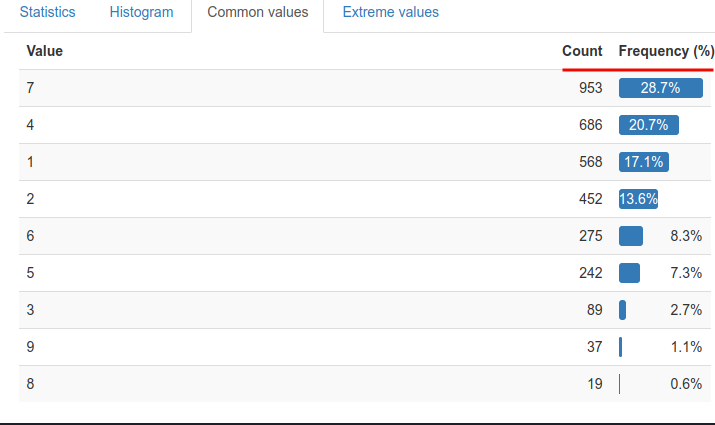
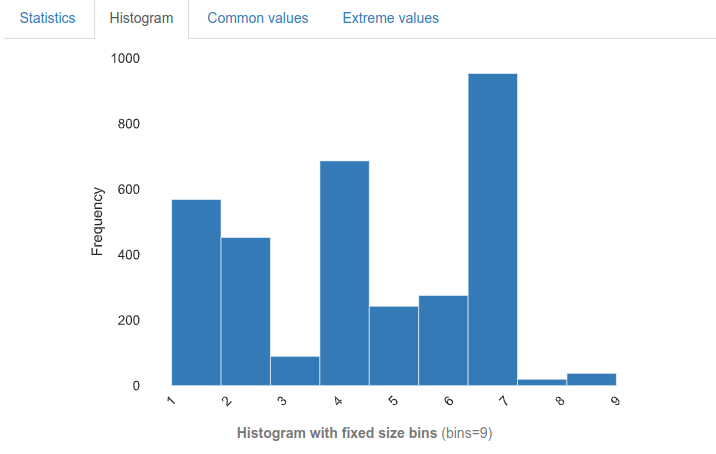

**StratifiedKFold**

Se usarmos o KFold para um conjunto de dados desbalanceado, podemos acabar  com dados de treinamento que contém poucas ou nenhuma classe minoritária.Portanto, para evitar esse problema, usamos o StratifiedKFold. **StratifiedKFold é uma versão melhorada de k-Fold que retorna folds estratificadas: cada conjunto contém aproximadamente a mesma porcentagem de amostras de cada classe de destino que o conjunto completo**.

Em outras palavras, StratifiedKFold embaralha seus dados (amostras sem reposição), depois divide os dados em n_splits partes e pronto. Agora, ele usará cada parte como um conjunto de teste. Observe que apenas e sempre embaralha os dados uma vez antes de dividir. Isso significa que cada parte preserva a mesma porcentagem de amostras de cada classe (rótulo) que os dados originais.

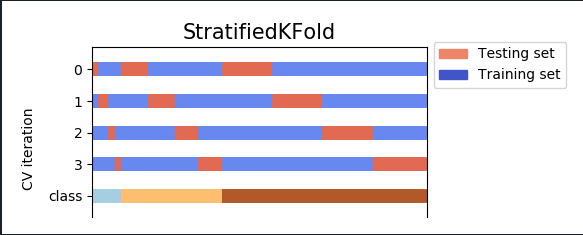

Source Image: <a href ="https://stackoverflow.com/questions/45969390/difference-between-stratifiedkfold-and-stratifiedshufflesplit-in-sklearn">difference between StratifiedKFold and StratifiedShuffleSplit in sklearn</a>


> O StratifiedKFold é usado quando é necessário balancear a porcentagem de cada classe para treinar e testar. Se não for necessário KFold é usado.

*References*

https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html


https://www.kaggle.com/code/vishnurapps/undersanding-kfold-stratifiedkfold-and-groupkfold/notebook

https://stackoverflow.com/questions/65318931/stratifiedkfold-vs-kfold-in-scikit-learn

https://scikit--learn-org.translate.goog/stable/modules/cross_validation.html?_x_tr_sl=en&_x_tr_tl=pt&_x_tr_hl=pt-BR&_x_tr_pto=sc#cross-validation


**Machine Learning with Python CookBook – 1ª Ed**

---

### Split

In [33]:
#semente do gerador de números aleatórios
seed = 42

# Separaremos 20% dos dados para testes
test_size = 0.20

# Separaremos 10% dos dados para validação
val_split = 0.1

# divisão dos dados train/test  
X_train, X_test, y_train, y_test =train_test_split(train_text,train_labels,random_state=seed,test_size=test_size, shuffle=True,stratify=train_labels) 
X_train2, X_test2, y_train2, y_test2 =train_test_split(train_text_sparse,train_labels_sparse,random_state=seed,test_size=test_size, shuffle=True,stratify=train_labels_sparse)

# dados de validação
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, random_state=101,test_size=val_split)

# shape
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)
print(X_train_val.shape, X_val.shape, y_train_val.shape, y_val.shape)

(2656,) (665,) (2656, 10) (665, 10)
(2390,) (266,) (2390, 10) (266, 10)


### Redes Neurais Recorrentes - RNNs

Segundo (Rashida Sucky, 2022) afirma que Redes Neurais Recorrentes (RNNs) são um dos algoritmos de última geração em aprendizado profundo, especialmente bons para **dados sequenciais**.Esse algoritmos é usado em muitos aplicativos de alto perfil, incluindo a pesquisa por voz do Google e o Siri da Apple. A razão pela qual se tornou tão popular é a sua memória interna. RNNs são o primeiro algoritmo de aprendizado profundo que pode lembrar a entrada. Após a invenção do LSTM e do GRU, os RNNs tornaram-se realmente poderosos.

### O que é uma Rede Neural Recorrente?

Observa-se (Rashida Sucky, 2022) destaca que as redes neurais recorrentes têm memória interna, elas podem lembrar coisas importantes da entrada e das camadas anteriores. É por isso que pode ser mais eficiente do que redes neurais regulares e RNNs são os algoritmos preferidos para dados sequenciais, como dados de texto, séries temporais, dados financeiros, previsão do tempo e muito mais.
​
### Como funcionam as redes neurais recorrentes?
​
Dessa forma, (Rashida Sucky, 2022) quantifica que para entendermos como uma rede neural recorrente funciona e quão especial ela é, precisamos compará-la com uma rede neural feedforward regular.
​
A figura a seguir ilustra está uma demonstração de imagem de uma rede neural feed-forward regular:

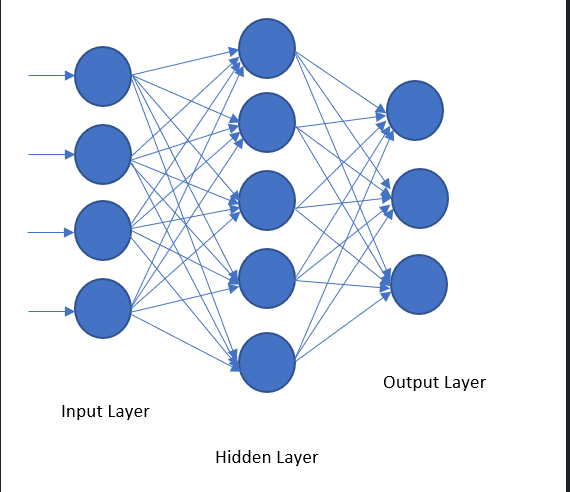

Source Image: (Rashida Sucky, 2022)

Um ponto importante disso, é  que em uma rede neural feed-forward, as informações se movem de uma camada para outra. Calculamos a camada oculta usando as informações da camada de entrada. Se houver várias camadas ocultas, apenas as informações da camada oculta anteriormente são usadas para calcular a próxima camada oculta. Quando a camada de saída é calculada, apenas as informações da camada anterior são usadas. Assim, quando estamos calculando a camada de saída, esquecemos a camada de entrada ou as outras camadas.(Rashida Sucky, 2022)

Mas quando estamos trabalhando (lidando) com dados de texto, dados de séries temporais ou quaisquer outros dados sequenciais, é importante lembrar também o que havia nas camadas anteriores.(Rashida Sucky, 2022).


Na RNNs, as informações circulam por um loop interno. Assim, quando o RNN calcula a camada de saída, considera a camada anterior e também a camada anterior. Porque tem memória de curto prazo. A figura a seguir está uma demonstração da imagem:

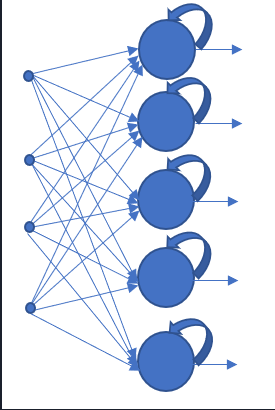

Source Image (Rashida Sucky, 2022)

As informações passam pela camada. Quando o ciclismo acontece, ele tem informações do passado recente. Aqui está a versão desenrolada da estrutura RNN que fornece uma melhor compreensão de como ela funciona:

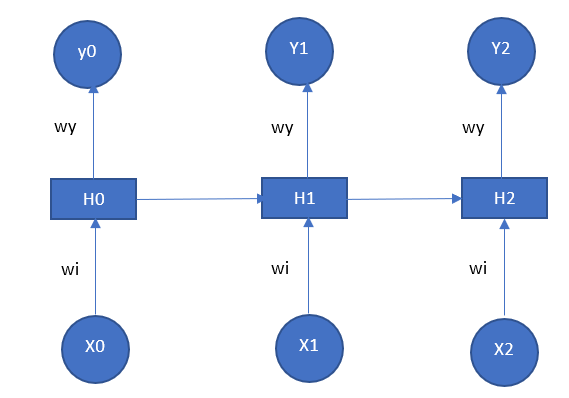
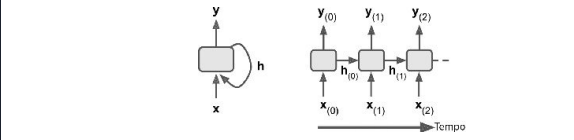

Source Image (Rashida Sucky, 2022) and ( Géron  2021)

Os compontes x0, x1 e x2 denotam as entradas. H0, H1 e H2 são os neurônios na camada oculta e y0, y1 e y2 são as saídas.

Conforme mostrado na figura acima, cada timestamp recebe as informações do neurônio anterior e também da entrada. As informações circulam em uma camada.

Isso é muito importante porque o neurônio anterior pode conter informações cruciais sobre o que está por vir. Por exemplo, considere esta frase

- O céu é azul

Se eu só conheço a palavra “é”, não consigo pensar no que vem a seguir. Mas se eu souber duas palavras consecutivas “céu é”, então poderemos pensar na palavra “azul”.


Mas isso também é uma limitação das redes neurais recorrentes. RNNs têm apenas uma memória de curto prazo. Mas a memória de curto prazo não é suficiente o tempo todo para descobrir o que está por vir. Por exemplo,

- Ela é chinesa e sua língua é…

Aqui, apenas lembrar as duas ou três palavras anteriores não nos dá o contexto para saber qual é a língua. Temos que percorrer todo o caminho para lembrar a palavra “chinês”. Só assim poderemos prever o nome do idioma.

É quando a memória de longo prazo (LSTM) ou a unidade recorrente fechada (GRU) ajudam. Ambos são versões mais avançadas do RNN simples e delica de entender

*References*

https://regenerativetoday.com/implementation-of-simplernn-gru-and-lstm-models-in-keras-and-tensorflow-for-an-nlp-project/

---

### Processamento de sequências usando RNNs

Segundo (Rashida Sucky, 2022), afirma que as redes neurais recorrentes abrevida (RNNs) são um dos algoritmos de última geração em aprendizado profundo, especialmente bons para **dados sequenciais**.Esse algoritmos é usado em muitos aplicativos de alto perfil, incluindo a pesquisa por voz do Google e o Siri da Apple. A razão pela qual se tornou tão popular é a sua memória interna. RNNs são o primeiro algoritmo de aprendizado profundo que pode lembrar a entrada. Após a invenção do LSTM e do GRU, os RNNs tornaram-se realmente poderosos.

No início de 2015, Keras disponibilizou a primeira implementação de código aberto e fácil de usar do LSTM, apenas no início de uma onda massiva de interesse renovado em redes neurais recorrentes até então, havia apenas “pesquisa código” que não poderia ser prontamente reutilizado. Então, de 2015 a 2017, as redes neurais recorrentes dominaram o crescente cerne de PNL. Os modelos LSTM bidirecionais, em particular, definem o estado da arte em muitos tarefas importantes, desde resumos até respostas a perguntas e tradução automática.

Dessa forma, neste capítulo adiante usaremos essas duas arquitetura de modelos citado anteriomente (LSTM e GRU) para treinamento do modelo.

#### Camadas embedding

Segundo (Chollet, 2021), defende que uma camada embedding é melhor cpmpreendida como um dicionário que mapeia índices inteiros
(que representam palavras específicas) para vetores densos. Ele recebe inteiros como entrada, procura
esses inteiros em um dicionário interno e retorna os vetores associados. É efetivamente uma pesquisa de dicionário conforme ilustra a figura a seguir.

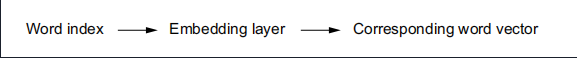

Source Image: (Chollet, 2021)

Nesse sentido, (Chollet, 2021) destacar que a camada embedding recebe como entrada um tensor de rank 2 de inteiros, de forma **(batch_size,sequence_length)**, onde cada entrada é uma sequência de inteiros. A camada então retorna um tensor de ponto flutuante 3D de forma **(batch_size, sequence_length, embedding_dimensionalidade).**


Além disso, quando instanciamos uma camada embedding, seus pesos **(seu dicionário interno de vetores de token)** são inicialmente aleatórios, assim como em qualquer outra camada. Durante o treinamento, esses vetores de palavras são gradualmente ajustados via retropropagação, estruturando o espaço em algo que o modelo downstream pode explorar. Uma vez totalmente treinado, embeddings 
o espaço mostrará muita estrutura, um tipo de estrutura especializada para o problema específico para o qual você está treinando seu modelo.(Chollet, 2021).


Nessa mesma linha de trabalho, por meio das palavras (Géron, 2021) ressalta a  ideia de usar vetores para representar palavras remonta à década de 1960, e muitas técnicas sofisticadas foram usadas para gerar vetores úteis, incluindo aqueles usados em redes neurais. No entanto, as coisas decolaram mesmo em 2013, quando Tomáš Mikolov e outros pesquisadores do Google publicaram um artigo (https://homl.info/word2vec) descrevendo uma técnica eficiente para aprender word embedding que usava redes neurais. Tal técnica possibilitou que eles aprendessem embeddings em um corpo de texto muito grande: eles treinaram uma rede neural para predizer as palavras perto de determinada palavra e obtiveram word embeddings impressionantes.


Observa-se (Chollet, 2021), refina fundamentalmente quando você codifica algo por meio de codificação one-hot, você está tomando uma decisão de engenharia de recursos. Você está injetando em seu modelo uma suposição fundamental sobre a estrutura do seu espaço de recursos. Essa suposição é que os diferentes tokens
você está codificando são todos independentes uns dos outros: de fato, vetores **one-hot são todos ortogonais uns aos outros.** E no caso das palavras, essa suposição está claramente errada. Palavras formam um espaço estruturado: eles compartilham informações entre si. As palavras “filme” e “filme” são intercambiáveis na maioria das frases, então o vetor que representa “filme” não deve ser ortogonal ao vetor que representa “filme” eles devem ser o mesmo vetor, ou perto o suficiente.

Acrescenta-se que (Chollet, 2021), destacar um conceito mais abstrato, a relação geométrica entre dois vetores de palavras deve refletir a relação semântica entre essas palavras. Por exemplo, em um espaço vetorial de palavras razoável, você esperaria que sinônimos fossem incorporados em palavras semelhantes vetores e, em geral, você esperaria que a distância geométrica (como o cosseno distância ou distância L2) entre quaisquer dois vetores de palavras para se relacionar com a “distância semântica” entre as palavras associadas. Palavras que significam coisas diferentes devem estar longe afastadas umas das outras, enquanto as palavras **relacionadas devem estar mais próximas.**

**Como resultado, as word embeddings são representações vetoriais de palavras que alcançam exatamente isso: eles mapear a linguagem humana em um espaço geométrico estruturado.**

  Apesar de considerando que os vetores obtidos através da **codificação one-hot são binários, esparsos (principalmente feito de zeros)** e muito alta dimensional (a mesma dimensionalidade que o número de
palavras no vocabulário), **as word-embedding são vetores de ponto flutuante de baixa dimensão
(isto é, vetores densos, em oposição a vetores esparsos);** veja a figura a seguir. É comum ver
word embeddings que são de 256 dimensões, 512 dimensões ou 1.024 dimensões.(Chollet, 2021)

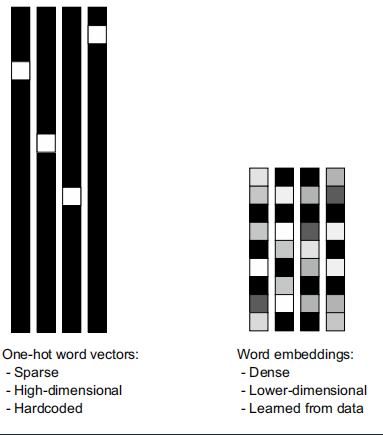

Source Image: (Chollet, 2021)

As Representações de palavras obtido a partir de codificação one-hot ou hash são esparsos, de alta dimensão, e codificado. As word embeddings são densa, relativamente de baixa dimensão e aprendeu com os dados.


De acordo (Chollet, 2021), salientar  que as representações densas, as word embeddings também são representações estruturadas, e sua estrutura é **aprendida a partir de dados**. Palavras semelhantes são incorporadas (agrupads) de perto locais e, além disso, direções específicas no espaço word-embedding são significativas.Por mais,(Chollet, 2021) destaca um um exemplo concreto.
  Na figura posteriomente , quatro palavras estão embutidas em um plano 2D: **gato, cachorro, lobo e tigre.**
Com as representações vetoriais que escolhemos aqui, algumas relações semânticas entre
essas palavras podem ser codificadas como transformações geométricas. Por exemplo, o mesmo
permite-nos passar do **gato ao tigre e do cão ao lobo:** este vetor poderia ser interpretado como o vetor *“do animal de estimação ao animal selvagem”*. Da mesma forma, outro vetor nos permite ir
de **cão a gato e de lobo a tigre**, o que poderia ser interpretado como “uma para felino” vetor.

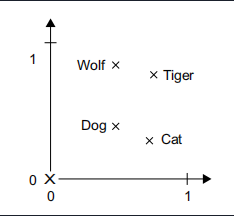

Source Image: (Chollet, 2021)

Em espaços de word embeddings do mundo real, exemplos comuns de geometria significativa as transformações são vetores de “gênero” e vetores “plurais”. Por exemplo, adicionando um
vetor “fêmea” para o vetor “rei”, obtemos o vetor “rainha”. Adicionando um vetor “plural”, obtemos “reis”. Os espaços de word-embedding geralmente apresentam milhares de tais vetores interpretáveis e potencialmente úteis. Vamos simplifica esse exemplo famoso conforme a figura a seguir ilustra, se você calcular **King – Man + Woman** (ao somar e subtrair os vetores embedding dessas palavras), o resultado será muito próximo do embedding da palavra **Queen**

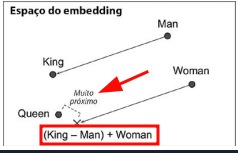

Source Image : (Géron, 2021)

Portanto, lembrando que as word embeddings faz a codificação do conceito de gênero! Mas, infelizmente, word embeddings às vezes registra nossos piores preconceitos. Por exemplo, embora eles aprendam corretamente que o homem está para um rei como a mulher está para uma rainha, aparentemente eles também aprendem que o homem está para um médico e que a mulher está para uma enfermeira: um viés bastante sexista! Para ser justo, este exemplo em particular é um tanto exagerado, conforme foi ressaltado em um artigo de 2019 (https://homl.info/fairembeds)10 de Malvina Nissim et al. Entretanto, assegurar equidade em algoritmos de aprendizado profundo é um tópico de pesquisa ativo e de suma importância (Géron, 2021).

#### Leitura adicional 

Uma matriz é denominada de **matriz esparsa** se a maior parte de seus elementos for **igual a zero** (ilustrada na figura a seguir por pontos). Por outro lado, **uma matriz densa** a maior parte de seus elementos for **diferente de zero**

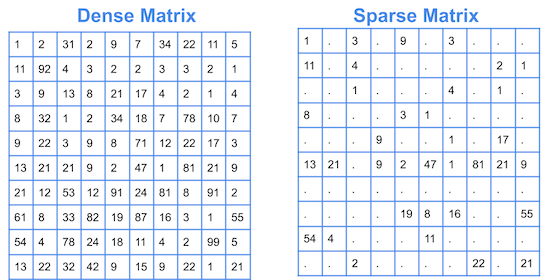

Source Image: <a href="https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/">link</a>


_References_

https://regenerativetoday.com/implementation-of-simplernn-gru-and-lstm-models-in-keras-and-tensorflow-for-an-nlp-project/

---

### Keras Tokenizer

Em primeira análise, antes de começar a menciona os métodos da classe keras Tokenizer.Vamos primeiro recorrente alguns conceitos teóricos sobre processamento de texto, pois classe keras Tokenizer é termo chave para modelagem preditiva do projeto.

Segundo (Chollet, 2021), modelos de deep learning, sendo funções diferenciáveis, só podem processar valores  numéricos: eles não podem receber texto bruto como entrada. Vetorizar texto é o processo de transformar texto em tensores numéricos. Os processos de vetorização de texto vêm em muitas formas e formulários, mas todos seguem o mesmo template.

- Primeiro, você padroniza o texto para torná-lo mais fácil de processar, como convertendo para minúsculas ou removendo a pontuação.

- Você divide o texto em unidades (chamadas de tokens), como caracteres, palavras ou grupos de palavras. Isso é chamado de tokenização. 

- Você converte cada token em um vetor numérico. Isso geralmente envolverá primeiro indexando todos os tokens presentes nos dados.

A figura a seguir ilustra cada etapa desse passo

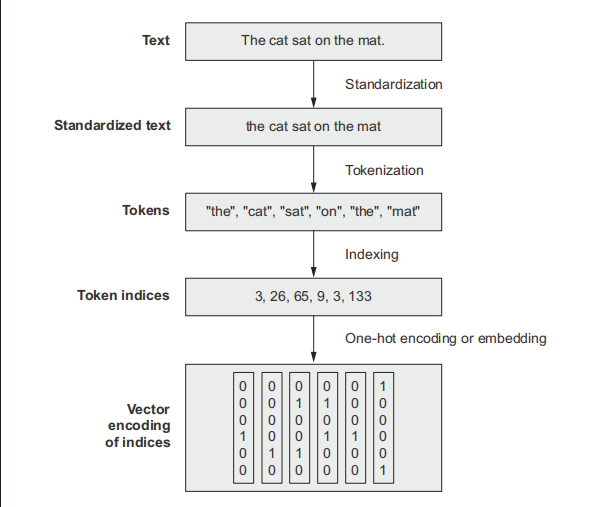

Source Image: (Chollet, 2021)


####  Text splitting (tokenization)

Segundo (Géron, 2021), ressalta que processo de tokenização é  dividir uma string em listas de pedaços ou "tokens". Um token é uma parte inteira. Por exemplos: uma palavra é um token em uma sentença. Uma sentença é um token em um parágrafo.

Token pode ser uma frase dentro de um paragráfo, pode ser uma palavra dentro de uma frase. Em outras palvaras
a tokenização é um método para segregar um texto específico em pequenos pedaços ou tokens. Aqui, os tokens ou pedaços podem ser qualquer coisa, de palavras a caracteres, até subpalavras.


Assim sendo, uma vez que seu texto esteja padronizado, você precisa dividi-lo em unidades para serem vetorizadas (tokens), uma etapa chamada tokenização. Você pode fazer isso de três maneiras diferentes como destaca (Chollet, 2021) assim temos:

- Tokenização em nível de palavra: onde os tokens são substrings separadas por espaço (ou separadas por pontuação). Uma variante disso é dividir ainda mais as palavras em subpalavras quando aplicável.Por exemplo, tratar "encarando" como "estrela+ing" ou "chamado" como “ligar+ed.”

- Tokenização de N-gram: onde tokens são grupos de N palavras consecutivas. Por exemplo, “o gato” ou “ele era” seriam tokens de 2 gramas (também chamados de bigramas).

- Tokenização em nível de personagem: onde cada personagem é seu próprio token. Na prática, esse esquema raramente é usado, e você só o vê realmente em contextos especializados, como geração de texto ou reconhecimento de fal.:

Em suma, tokenização é dividida em 3 tipos principais:

- Tokenização de palavras
- Tokenização de caracteres
- Tokenização de subpalavras

Em geral, (Chollet, 2021) refina  sempre usaremos a tokenização em nível de palavra ou N-gram. Existem dois
tipos de modelos de processamento de texto: aqueles que se preocupam com a ordem das palavras, **chamados de modelos de sequência**, e aqueles que tratam as palavras de entrada como um conjunto, descartando sua ordem original, chamados modelos de saco de palavras. Se você estiver construindo um modelo de sequência, usará tokenização em nível de palavra e, se estiver construindo um modelo de saco de palavras, usará tokenização N-gram.

N-grams são uma maneira de injetar artificialmente uma pequena quantidade de informações de ordem de palavras locais no modelo. Ao longo deste capítulo, você aprenderá mais sobre cada tipo de modelo e quando usá-los.


*References*

https://machinelearningknowledge.ai/keras-tokenizer-tutorial-with-examples-for-fit_on_texts-texts_to_sequences-texts_to_matrix-sequences_to_matrix/

https://keras.io/api/layers/core_layers/embedding/

https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/

---


### Classe de Tokenizador Keras

A sintaxe   a seguir mostra a função Keras “Tokenizer”, juntamente com todos os parâmetros que são usados na função para diversos fins.


In [ ]:
?tf.keras.preprocessing.text.Tokenizer

### Métodos da classe Keras Tokenizer

Observa-se (Palash Sharma , 2021) destaca os  métodos da classe Keras Tokenizer assim:

#### fit_on_texts

O método fit_on_texts faz parte da classe de tokenizer Keras que é usada para atualizar o vocabulário interno da lista de textos. **Precisamos chamar  antes de usar outros métodos de text_to_sequences ou text_to_matrix.**

O objeto retornado por fit_on_texts pode ser usado para obter mais informações usando os seguintes atributos

- word_counts : É um dicionário de palavras junto com as contagens.
- word_docs : Novamente um dicionário de palavras, isso nos diz quantos documentos contêm essa palavra
- word_index : Neste dicionário, temos inteiros únicos atribuídos a cada palavra.
- document_count : Essa contagem de inteiros nos informará o número total de documentos usados para ajustar o tokenizer.

#### text_to_sequences

O método text_to_sequences ajuda na conversão de tokens de corpus de texto em uma sequência de inteiros.

#### text_to_matrix

Um outro método útil da classe tokenizer é a função text_to_matrix() para converter o documento em um formato de matriz numpy.

Esta função funciona em 4 modos diferentes:

- binary : O valor padrão que nos informa sobre a presença de cada palavra em um documento.
- contagem : Como o nome sugere, a contagem de cada palavra no documento é conhecida.
- tfidf : A pontuação TF-IDF para cada palavra no documento.
- freq : A frequência nos informa sobre a proporção de palavras em cada documento.

#### sequences_to_matrix

Esta função sequences_to_matrix() da classe tokenizer Keras é usada para converter as sequências em uma forma de matriz numpy.

sequences_to_matrix também tem 4 modos diferentes para trabalhar:

- binary : O valor padrão que nos informa sobre a presença de cada palavra em um documento.
- contagem : Como o nome sugere, a contagem de cada palavra no documento é conhecida.
- tfidf : A pontuação TF-IDF para cada palavra no documento.
- freq : A frequência nos informa sobre a proporção de palavras em cada documento.

Assim sendo, tivemos um breve resumo da classe da classe Keras Tokenizer explicada por (Palash Sharma, 2021).


*References*

https://machinelearningknowledge.ai/keras-tokenizer-tutorial-with-examples-for-fit_on_texts-texts_to_sequences-texts_to_matrix-sequences_to_matrix/

https://keras.io/api/layers/core_layers/embedding/

https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/

---

### Tokenization  texts_to_sequences

Precisamos converter os dados de texto em representação numérica, para que o modelo os entenda.De acordo, os conceitos citados anteriormente usaremos para modelagem preditiva  text_to_sequences

### Sequência e preenchimento

Em primeira instância, vamos representar cada frase por sequências de números usando text_to_sequences do objeto Tokenizer. Depois disso, nós preenchemos a sequência para que possamos ter o mesmo comprimento de cada sequência.

- num_words : quantas palavras únicas que queremos carregar nos dados de treinamento e teste. Em outras palavras, número máximo de palavras a serem usadas. (mais frequente)

- oov_token : token fora do vocabulário será adicionado ao índice de palavras no corpus que é usado para construir o modelo. Isso é usado para substituir palavras fora do vocabulário (palavras que não estão em nosso corpus) durante chamadas text_to_sequence.

- padding : 'pre' ou 'post (predefinição). Ao usar pre, vamos preencher antes de cada sequência e post vai preencher após cada sequência.

- maxlen : comprimento máximo de todas as sequências. Se não for fornecido, por padrão, usará o comprimento máximo da frase mais longa. Em outras palavras é comprimento máximo de palavras será usado para cada pedaço de texto ou para prever um rótulo.

- truncando: 'pre' ou 'post' (padrão 'pre'). Se um comprimento de sequência for maior que o valor maxlen fornecido, esses valores serão truncados para maxlen. A opção 'pre' será truncada no início, enquanto a opção 'post' será truncada no final das sequências

#### Definindo parâmetros de pré-processamento 

In [34]:
vocab_size = 3320 # Tamanho máximo do vocabulário
oov_token = "[UNK]" # out of vocabulary token
embed_dim = 10 # camada embedding 10 vetores de comprimento para representar cada palavra.
max_seq_len = 6 # Número máximo de palavras em cada sequences

In [35]:
# Criando uma instância da classe Tokenizer
tokenizer = keras.preprocessing.text.Tokenizer(oov_token = oov_token, 
                                               num_words=vocab_size,
                                               char_level=False,
                                               lower=True,
                                               )
# ajuste os dados, ou seja, aplica tokenizador ajustando um tokenizer ao texto
tokenizer.fit_on_texts(X_train.values)
tokenizer.fit_on_texts(X_train_val.values)
tokenizer.fit_on_texts(X_test.values)

# conversão de tokens de corpus de texto em uma sequência de inteiros 
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_train_val = tokenizer.texts_to_sequences(X_train_val)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Truncando e preenchendo as sequências de entrada para que todas tenham o mesmo comprimento para modelagem.
padded_train = pad_sequences(sequences_train, padding = 'post', maxlen=max_seq_len)
padded_train_val = pad_sequences(sequences_train_val, padding = 'post', maxlen=max_seq_len)
padded_test = pad_sequences(sequences_test, padding = 'post', maxlen=max_seq_len)


#ajuste os dados, ou seja, aplica tokenizador ajustando um tokenizer ao texto
tokenizer.fit_on_texts(X_train2.values)
tokenizer.fit_on_texts(X_test2.values)

# conversão de tokens de corpus de texto em uma sequência de inteiros 
sequences_train2 = tokenizer.texts_to_sequences(X_train2)
sequences_test2 = tokenizer.texts_to_sequences(X_test2)

# Truncando e preenchendo as sequências de entrada para que todas tenham o mesmo comprimento para modelagem.
padded_train2 = pad_sequences(sequences_train2, padding = 'post', maxlen=max_seq_len)
padded_test2 = pad_sequences(sequences_test2, padding = 'post', maxlen=max_seq_len)


### sequences_to_matrix

'''
Esta função sequences_to_matrix() da classe tokenizer Keras é usada para converter as sequências em uma forma de matriz numpy.

sequences_to_matrix também tem 4 modos diferentes para trabalhar

binary : O valor padrão que nos informa sobre a presença de cada palavra em um documento.
count : como o nome sugere, a contagem de cada palavra no documento é conhecida.
tfidf : a pontuação TF-IDF para cada palavra no documento.
freq : A frequência nos informa sobre a proporção de palavras em cada documento.
'''

# aplicando modo binário converter as sequências em uma forma de matriz numpy.
train_binary = tokenizer.sequences_to_matrix(sequences_train,mode = 'binary')
test_binary = tokenizer.sequences_to_matrix(sequences_test,mode = 'binary')


# Truncando e preenchendo as sequências de entrada para que todas tenham o mesmo comprimento para modelagem.
padded_train_binary = pad_sequences(train_binary, padding = 'post', maxlen=max_seq_len)
padded_test_binary = pad_sequences(test_binary , padding = 'post', maxlen=max_seq_len)

print('Shape of training, validation and testing tensor: ', padded_train.shape, padded_train_val.shape, padded_test.shape)

Shape of training, validation and testing tensor:  (2656, 6) (2390, 6) (665, 6)


In [36]:
max_id = len(tokenizer.word_index)+1
max_id

3322

### Definindo a arquitetura do modelo usando memória bidirecional de Longo Prazo (Bi-LSTM)

### A célula de memória longa de curto prazo ou Células LSTM

De acordo (Géron, 2021), apura que a célula memória longa de curto prazo (LSTM) foi proposta em 1997
(https://homl.info/93) por Sepp Hochreiter e Jürgen Schmidhuber e foi gradualmente aprimorada ao longo dos anos por diversos pesquisadores, como Alex Graves (https://homl.info/graves), Haşim Sak
(https://homl.info/94) e Wojciech Zaremba (https://homl.info/95). Note que se você considerar a célula LSTM como uma caixa-preta, ela pode ser usada como uma célula básica e terá um desempenho muito melhor; o treinamento convergirá mais rápido e detectará as dependências de longo prazo nos dados.


Em outras palavras, a LSTM foi projetada para superar os problemas da simples Rede Neural Recorrente (RNN), permitindo que a rede armazene dados em um tipo de memória que possa ser acessada posteriormente.No entanto, usando as LSTM realizaremos menos operações matemáticas não compromentendo a memória do computador, ou seja, vamos opera com que mais importante para realiza as previsões. A figura a seguir ilustra a arquitetura da LSTM.

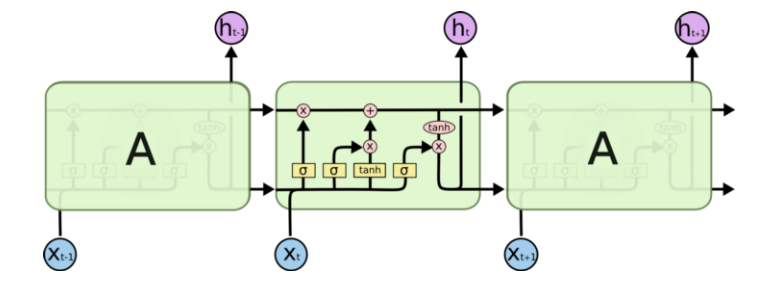

Source: https://colah.github.io/posts/2015-08-Understanding-LSTMs/

Observa-se (Khairu Nissa, 2021), apura que chave do modelo LSTM é o estado da célula. O estado da célula é atualizado duas vezes com poucos cálculos que estabilizam os gradientes resultantes. Porém possui um estado oculto que atua como uma memória de curto prazo.Conforme a figura ilustra

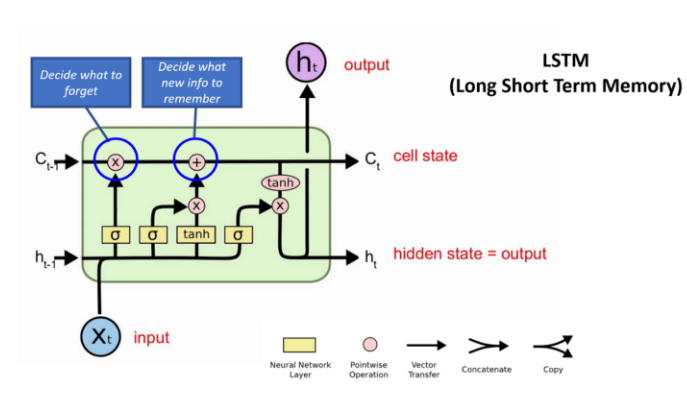

A LSTM existem três portões o Forget Gate, Input Gate e Output Gate é explica por (Khairu Nissa, 2021) com .

- O primeiro passo é decidir quais informações vamos jogar fora do estado da célula. Essa decisão é feita por uma camada sigmóide de camada “Forget Gate” que controla quais partes do estado de longo prazo devem ser deletados

- O segundo passo é decidir quais novas informações vamos armazenar no estado da célula. Isso tem duas partes. Primeiro, uma camada sigmóide chamada de camada “Input Gate” decide quais valores atualizaremos. Em seguida, uma camada tanh que cria um vetor de novos valores candidatos que podem ser adicionados ao estado.

- Finalmente, precisamos decidir o que vamos produzir. Essa saída será baseada em nosso estado de célula, mas será uma versão filtrada. Primeiro, executamos uma camada sigmóide que decide quais partes do estado da célula vamos produzir. Em seguida, colocamos o estado da célula em tanh (para empurrar os valores entre -1 e 1) e multiplicamos pela saída da porta sigmóide, para que apenas produzamos as partes que decidimos.

É imporntante destaca que uma célula LSTM resumidamente pode aprender a reconhecer uma entrada importante (essa é a função do Input Gate), armazená-la no estado de longo razo, preservá-la pelo tempo que for necessário (esse é o papel do Forget Gate) e extraí-la sempre que necessário. Isso explica por que essas células têm sido extremamente bem-sucedidas na identificação de padrões de longo prazo em séries temporais, textos longos, gravações de áudio e muito mais.

Dessa maneira, explicar todos mecanismos que envolve a matemática por trás da célula LSTM está fora do  escopo desse projeto.Mediante o exposto, atenção para projeto é implementa essa arquitetura para resolver problema de negócio, como a inferência da classificação de mutações genéticas base em artigo científico médicos.

### Implementando arquitetura do modelo usando Memória Bidirecional de Longo Prazo (Bi-LSTM)

Segundo (Khairu Nissa, 2021), defende que LSTM bidirecional, ou Bi-LSTM, é um modelo de processamento de sequência que consiste em duas células LSTMs: uma recebendo a entrada em uma direção direta e o outra em uma direção inversa. As Bi-LSTMs aumentam efetivamente a quantidade de informações disponíveis para a rede, melhorando o contexto disponível para o algoritmo (por exemplo, saber quais palavras seguem e precedem imediatamente uma palavra em uma frase). Ao contrário do LSTM padrão, a entrada do Bi-LSTM flui em ambas as direções e é capaz de utilizar informações de ambos os lados.Assim como, é uma também uma ferramenta poderosa para modelar as dependências sequenciais entre palavras e frases em ambas as direções da sequência.


Além disso, a Bi-LSTM adiciona mais uma camada LSTM, que inverte a direção do fluxo de informações. Resumidamente, isso significa que a sequência de entrada flui para trás na camada LSTM adicional. Em seguida, combinamos as saídas de ambas as camadas LSTM de várias maneiras, como média, soma, multiplicação ou concatenação.A figura a seguir mostra essa arquitetura. (Khairu Nissa, 2021)

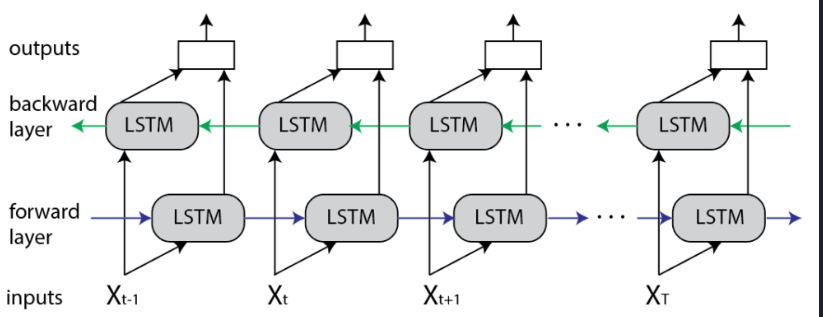

Source: https://www.baeldung.com/cs/bidirectional-vs-unidirectional-lstmSource: 


---

*References*

**Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow. 2°ed** 

https://medium.com/mlearning-ai/the-classification-of-text-messages-using-lstm-bi-lstm-and-gru-f79b207f90ad

---
 

### Hyperparameter Optimization

Eventualmete, experimentar cegamente diferentes configurações de arquitetura funciona bem se você só precisa de algo que funcione bem. Nesta seção, iremos além de “funciona bem” para “funciona muito bem" por meio de um conjunto de técnicas obrigatórias para construir modelos de aprendizado profundo de última geração.


De acordo (Chollet, 2021), apura quando construirmos modelos deep learning, você precisa fazer muitas escolhas aparentemente arbitrárias.**Decisões: quantas camadas você deve empilhar? Quantas unidades ou filtros devem entrar cada camada? Você deve usar relu como ativação ou uma função diferente? Você deve usar
BatchNormalization após uma determinada camada? Quanto dropout você deve usar?** E então,
sobre esses parâmetros de nível de arquitetura são chamados de hiperparâmetros para distingui-los
a partir dos parâmetros de um modelo, que são treinados via retropropagação.

Na prática, engenheiros e pesquisadores experientes em aprendizado de máquina constroem intuição ao longo do tempo sobre o que funciona e o que não funciona quando se trata dessas escolhas eles desenvolvem habilidades de ajuste de hiperparâmetros. Mas não há regras formais. Se você quiser para chegar ao limite do que pode ser alcançado em uma determinada tarefa, você não pode se contentar com escolhas tão arbitrárias. Suas decisões iniciais são quase sempre abaixo do ideal, mesmo que você tem uma intuição muito boa. Você pode refinar suas escolhas ajustando-as manualmente e retreinar o modelo repetidamente - é isso que os engenheiros de aprendizado de máquina e pesquisadores passam a maior parte do tempo fazendo. Mas não deveria ser seu trabalho como humano mexer com hiperparâmetros o dia todo - isso é melhor deixar para uma máquina (Chollet, 2021).


Assim, (Chollet, 2021) refina que  precisamos explorar o espaço de decisões possíveis de forma automática, sistemática, de forma baseada em princípios. Você precisa pesquisar o espaço da arquitetura e encontrar as arquiteturas com melhor desempenho empiricamente. É disso que se trata o campo da otimização automática de hiperparâmetros: é um campo inteiro de pesquisa e importante.O processo de otimização de hiperparâmetros normalmente se parece com isso:

1. Escolha um conjunto de hiperparâmetros (automaticamente).
2. Construa o modelo correspondente.
3. Ajuste-o aos seus dados de treinamento e meça o desempenho nos dados de validação.
4. Escolha o próximo conjunto de hiperparâmetros para tentar (automaticamente).
5. Repita.
6. Eventualmente, meça o desempenho em seus dados de teste.

Além do mais, a chave para este processo é o algoritmo que analisa a relação entre o desempenho da validação e vários valores de hiperparâmetros para escolher o próximo conjunto de hiperparâmetros para avaliar. Muitas técnicas diferentes são possíveis: **otimização bayesiana, algoritmos genéticos, busca aleatória simples e assim por diante.**

  Acrescente-se que, treinar os pesos de um modelo é relativamente fácil: você calcula uma função de perda em um mini-lote de dados e, em seguida, use backpropagation para mover os pesos na direita direção. A atualização de hiperparâmetros, por outro lado, apresenta desafios únicos.Considere estes pontos segundo (Chollet, 2021):

- O espaço de hiperâmetros é necessariamente composto de decisões discretas e, portanto, não é contínuo ou diferenciável. Portanto, você normalmente não pode fazer gradiente descendente no espaço de hiperparâmetros. Em vez disso, você deve confiar na otimização sem gradiente técnicas, que naturalmente são muito menos eficientes do que gradiente descendente.

- Calcular o sinal de feedback deste processo de otimização (este conjunto de hiperparâmetros levam a um modelo de alto desempenho nesta tarefa?) caro: requer a criação e treinamento de um novo modelo do zero em seu conjunto de dados.

- O sinal de feedback pode ser ruidoso: se uma corrida de treinamento teve um desempenho 0,2% melhor, isso por causa de uma melhor configuração do modelo, ou porque você teve sorte com os valores iniciais de peso?

Felizmente, existe uma ferramenta que simplifica o ajuste de hiperparâmetros: KerasTuner.Vamos usar essa  ferramenta para problema.

---

Em seguida, vamos escrever uma função de construção do modelo reutilizável que usaremos em todos os nossos experimentos nesta seção.

In [39]:
def build_model(hp):
    
    # Cria uma instância da Classe Sequential
    model = Sequential()
    
    '''
    Amostra de valores de hiperparâmetros do objeto HP. Após a amostragem, esses valores
    (como a variável "unidades" aqui) são apenas constantes regulares do Python.
    '''
    hp_vector_size = hp.Int('vector_size', min_value= 6, max_value = 16, step = 2)
    
    # Cria o model
    model.add(
               Embedding(input_dim= max_id,
               output_dim= embed_dim,
               input_length=max_seq_len,
               mask_zero=True)
    )
    # SpatialDropout1D executa dropout variacional em modelos NLP.Ou seja, que ajuda a reduzir o número de parâmetros no modelo e evitar o overfitting.
    #https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17
    
    hp_spatialDropout1D = hp.Float('spatialDropout1D', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(hp_spatialDropout1D))
    
    # Adicione uma camada regulariação  Dropout   
    hp_dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(hp_dropout_rate))
    
    # Adicione 2 camadas LSTM Bidirecional unidades internas.
    hp_lstm_unist1 = hp.Int('lstm_units1',min_value=8, max_value=12,step=2)
    model.add(LSTM(hp_lstm_unist1,return_sequences=True))
    hp_lstm_unist2 = hp.Int('lstm_units2',min_value=4, max_value=8,step=2)
    model.add(LSTM(hp_lstm_unist2))
  

    '''
    Adicione uma camada Densa de saída com 12 unidades ou neurônios (um por classe).
    A função de ativação é softmax usando a função de ativação softmax(pois as classes são exclusivas)..
    '''
    model.add(Dense(10,activation='softmax'))
    
    '''
    Adicione a taxa de aprendizagem, ou seja, é a que ajuda regularizar a magnitude (tamanho)
    seria um fator escalar modulando a “velocidade” do processo de descida do gradiente.
    multiplicar taxa de aprendizado X gradiente como  de forma de controla  magnitude da alteração 
    '''
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3,1e-5,1e-6])
    
    '''
    Diferentes tipos de hiperparâmetros estão disponíveis: Int, Flutuar, booleano, escolha.
    '''
    hp_optimizer = hp.Choice(name="optimizer", values=["adam","nadam"])
    
    '''
    Compila model
    '''
    model.compile(
        optimizer= hp_optimizer,
        loss='categorical_crossentropy',
        #metrics=[tf.metrics.Accuracy,tf.keras.metrics.Precision(), tf.keras.metrics.Precision,tf.keras.metrics.AUC()])
        metrics=['accuracy','Precision','Recall','AUC'])
    
    #A função retorna um modelo compilado.
    return model

> Como nossos rótulos são categóricos, eles são convertidos em uma matriz binária de tamanho 1 x 9, onde cada posição pode ter um valor de 0 ou 1. Nesta matriz, todos os valores são 0, **exceto o índice que representa o rótulo associado à amostra de dados**. Por exemplo, se na 1ª posição tivermos 'class1' e a amostra estiver rotulada como 'class1', o array será parecido com [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], onde todas as outras posições se referem ao outros rótulos.Dessa forma, usaremos essa abordagem agora.

> Do mesmo modo, usaremos a perda “sparse_categorical_cross entropy” na segunda etapa do projeto porque temos rótulos esparsos (ou seja, para cada instância, existe somente um índice de classe-alvo, de 0 a 9 nesse caso), e as classes são exclusivas. Assim temos, uma probabilidade-alvo por classe para cada instância (como vetores one-hot, por ex.[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] para representar a classe 3), então precisaríamos usar o “categorical_crossentropy” e não a perda **sparse**. Se estivéssemos fazendo uma classificação binária (com um ou mais rótulos binários), usaríamos o “sigmoid” (ou seja, a logística) na função de ativação na camada de saída, em vez da função de ativação “softmax”, e usaríamos a perda
“binary_crossentropy

---

O próximo passo é definir um “sintonizador”. Esquematicamente, você pode pensar em um sintonizador como um loop que irá repetidamente

- Escolha um conjunto de valores de hiperparâmetros
- Chame a função de construção de modelo com esses valores para criar um modelo
- Treinar o modelo e registrar suas métricas

De acordo (Chollet, 2021), KerasTuner tem vários sintonizadores integrados disponíveis: RandomSearch, BayesianOptimization e Hyperband. Vamos tentar BayesianOptimization, um sintonizador que tenta fazer previsões inteligentes para as quais novos valores de hiperparâmetros provavelmente terão melhor desempenho dados os resultados das escolhas anteriores:

### Objective maximization and minimization
Para métricas integradas (como accuracy), a direção da métrica (accuracy
deve ser maximizado, mas uma perda deve ser minimizada) é inferido pelo KerasTuner.
No entanto, para uma métrica personalizada, você mesmo deve especificá-la, assim:

In [40]:
objective = kt.Objective(
 name="val_recall", # O nome da métrica, como encontrado em registros da época
 direction="max" # a métrica direção desejada: "min" ou "max"
)

In [41]:
tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective("val_recall", direction="max"),
    max_trials=40,
    executions_per_trial=3,
    directory="research_tuner/mutations_bi_lstm",
    overwrite = True,
)

2022-12-02 16:40:25.388249: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:
# Exibir uma visão geral do espaço de pesquisa via search_space_summary ()
tuner.search_space_summary()

Search space summary
Default search space size: 7
vector_size (Int)
{'default': None, 'conditions': [], 'min_value': 6, 'max_value': 16, 'step': 2, 'sampling': None}
spatialDropout1D (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
lstm_units1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 12, 'step': 2, 'sampling': None}
lstm_units2 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 8, 'step': 2, 'sampling': None}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 1e-05, 1e-06], 'ordered': True}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'nadam'], 'ordered': False}


Finalmente, vamos iniciar a pesquisa.

In [43]:
#Limpamos a sessão Keras e gerando semente aleatória
keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

'''
Usando as funções de callbacks,adicionando retornos de chamada para o melhor ponto de verificação do modelo

Uma forma de implementar a early stopping é simplesmente usar a callback da EarlyStopping. Ela interromperá o treinamento quando não calcular
nenhum progresso na validação definida para várias épocas (definida pelo argumento patience) e, opcionalmente, reverterá para o melhor modelo. Você
pode combinar as duas callbacks para salvar os pontos de verificação do modelo (no caso de o computador travar) e interromper o treinamento com
antecedência, quando não houver mais progresso (a fim de evitar perda de tempo e de recursos)

'''
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss",mode='min', patience=40),
]

'''
Isso leva o mesmo  argumentos como fit() (simplesmente passa-lhes até fit() para cada novo modelo).
'''
tuner.search(
            padded_train, y_train,
            batch_size=10,
            epochs=100,
            #validation_data=(padded_train_val, y_train_val), 
            validation_split=val_split,
            callbacks=callbacks,
            #verbose = 1
)
'''a
Usamos um grande número de épocas (você não sabe de antemão como muitas épocas que cada modelo precisará) e use um EarlyStopping
callback para parar de treinar quando você começar a fazer overfitting
'''

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 40 Complete [00h 02m 30s]
val_recall: 0.45864661534627277

Best val_recall So Far: 0.5012531379858652
Total elapsed time: 01h 46m 13s
INFO:tensorflow:Oracle triggered exit


In [44]:
#Retorna uma lista de HyperParameter objetos, que você pode passar para o função de construção de modelo
def best():
    print(best_hps.get('vector_size'))
    print(best_hps.get('spatialDropout1D'))
    print(best_hps.get('dropout_rate'))
    print(best_hps.get('lstm_units1'))
    print(best_hps.get('lstm_units2'))
    print(best_hps.get('learning_rate'))
best()

14
0.1
0.2
8
6
0.001


Dessa forma, vamos cria o modelo com os hiperparâmetros ideais de acordo com espaço pesquisa encontrando com hiperparâmetros específicos. Antes vamos criar alguns funções auxiliares para mapeamento das métricas de avaliação

### Métricas e avaliação de classificação

Definindo o diretório de root log que usaremos para nossos logs do TensorBoard

In [45]:
# definindo caminho dos logs
root_logdir = os.path.join(os.curdir, "mutations_logs")

# criando a função
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./mutations_logs/run_2022_12_02-18_26_46'

In [108]:
#https://stackoverflow.com/questions/60860121/plotly-how-to-make-an-annotated-confusion-matrix-using-a-heatmap
def plot_confusion_matrix(cm, labels, title):
# cm : confusion matrix list(list)
# labels : name of the data list(str)
# title : title for the heatmap
    data = go.Heatmap(z=cm, y=labels, x=labels)
    annotations = []
    for i, row in enumerate(cm):
        for j, value in enumerate(row):
            annotations.append(
            {
                    "x": labels[i],
                    "y": labels[j],
                    "font": {"color": "white"},
                    "text": str(value),
                    "xref": "x1",
                    "yref": "y1",
                    "showarrow":False,
            })
    layout = {
        "title": title,
        "margin":{"t":60, "l":150},
        "height":550,
        "xaxis": {"title": "Predicted value"},
        "yaxis": {"title": "Real value"},
        "width":900,
        "template": "ggplot2",
        "annotations": annotations
    }
    fig = go.Figure(data=data, layout=layout)
    return fig

### Construindo o modelo com  hiperparâmetros ideais e treine-o nos dados por 100 épocas

In [47]:
# criando modelo com melhores HyperParameter ideais
model_bets_hp = tuner.hypermodel.build(best_hps)

# logs
run_logdir = get_run_logdir()

'''
Usando as funções de callbacks,adicionando retornos de chamada para o melhor ponto de verificação do modelo
'''
callbacks= [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        mode='min',patience=40,
        restore_best_weights=True
    ),
    #salva os pontos de verificação do modelo em intervalos regulares durante o treinamento, por padrão
    keras.callbacks.ModelCheckpoint(filepath="models/mutations_bi_lstm.h5", save_best_only=True),
    keras.callbacks.TensorBoard(run_logdir),
    TqdmCallback(verbose=0)
]
# fit the model
model_bets_hp.fit(
          padded_train,y_train,
          batch_size=10,
          epochs=100,
          validation_split= val_split,
          verbose=0,
          callbacks=callbacks
)
# Carrega e Avalia o modelo
mutations_bi_lstm = keras.models.load_model("models/mutations_bi_lstm.h5") # retornar para o melhor modelo

print('\nAvaliação do modelo em Dados Teste')
model = mutations_bi_lstm.evaluate(padded_test,y_test)
model

0epoch [00:00, ?epoch/s]


Avaliação do modelo em Dados Teste
21/21 [==============================] - 2s 1ms/step - loss: 1.3051 - accuracy: 0.5489 - precision: 0.6116 - recall: 0.4120 - auc: 0.9021


[1.3050509691238403,
 0.548872172832489,
 0.6116071343421936,
 0.41203007102012634,
 0.9020777344703674]

### Predictions evaluate with Classification Report and Confusion Matrix

A avaliação da classificação multiclasse é um pouco mais complicada do que a binária, pois avaliamos uma matriz NxN onde N é o número de classes na tarefa em oposição à matriz 2x2 para classificação binária. Portanto, para simplificar, são usadas técnicas de média, como média aritmética (macro), média ponderada e precisão geral. Como a precisão não é a melhor métrica, uma escolha entre média aritmética e média ponderada é feita normalmente, com base na distribuição de classes do conjunto de dados.

Métricas em Teste:
                precision    recall  f1-score   support

           1       0.48      0.69      0.57       114
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00        18
           4       0.57      0.69      0.62       137
           5       0.00      0.00      0.00        48
           6       0.54      0.40      0.46        55
           7       0.58      0.88      0.70       191
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         7

    accuracy                           0.55       665
   macro avg       0.24      0.30      0.26       665
weighted avg       0.41      0.55      0.46       665



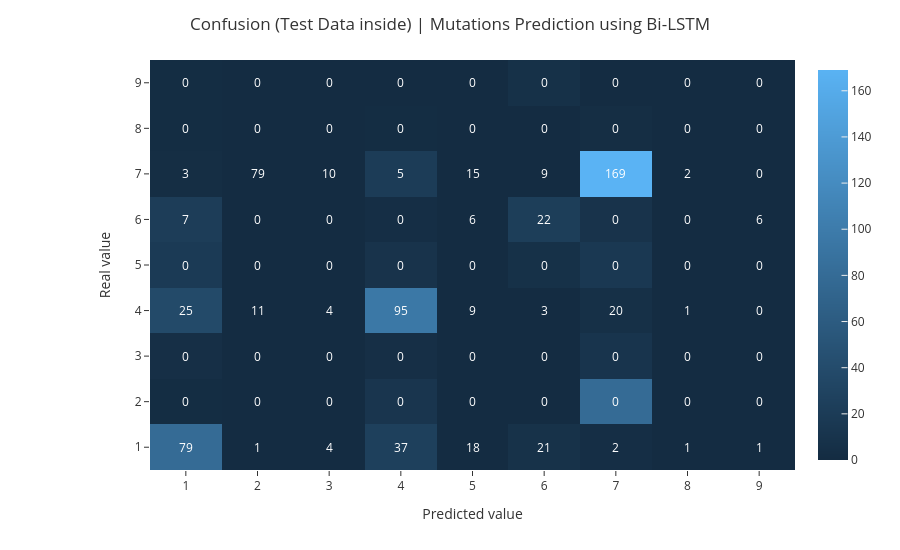

In [109]:
y_pred_ohe_hot_encoded =mutations_bi_lstm.predict(padded_test)
#y_pred_ohe_hot_encoded =model_bi_lstm.predict(padded_test > 0.5).astype("int32")

y_pred   = np.array(tf.argmax(y_pred_ohe_hot_encoded, axis= 1))
y_labels = np.array(tf.argmax(y_test, axis= 1))
print("Métricas em Teste:\n ", classification_report(y_labels,y_pred))
print('='*110)

# chamada da function
plot_confusion_matrix(confusion_matrix(y_labels, y_pred),df_merge['class'].unique(),'Confusion (Test Data inside) | Mutations Prediction using Bi-LSTM')

### Inicializando o TensorBoard

In [115]:
%load_ext tensorboard
%tensorboard --logdir=./mutations_logs --port=7007

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 7007 (pid 1809921), started 0:12:54 ago. (Use '!kill 1809921' to kill it.)




Como você pode ver, a accuracy após 10 épocas para o conjunto de treinamento é entorno de 66% aumentando  constantemente e a accuracy em validação é em cerca 52% tendendo uma queda levemente uniforme ruim

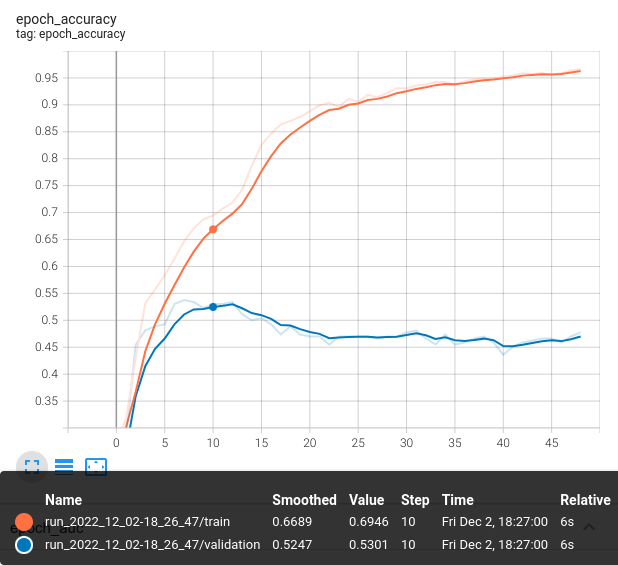

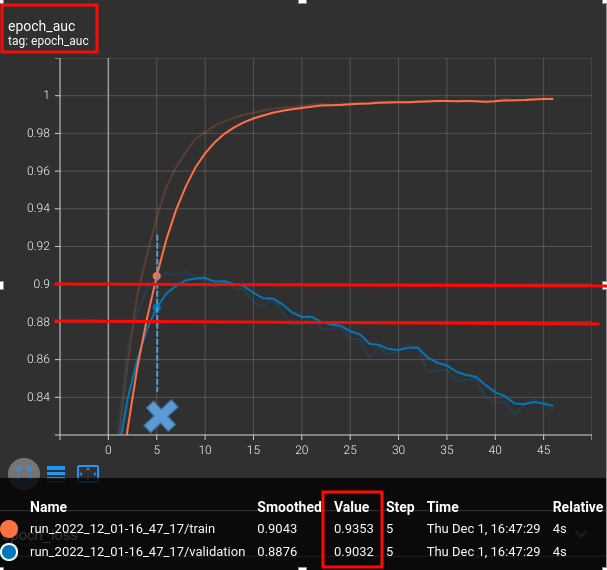

---

Ainda mas, há grande  problema de overfitting no modelo. Mas nos projetos de PNL, algum overfitting é normal. Porque não importa quais sejam os bancos (tamanho de vocabulário) de palavras em seu conjunto de treinamento, os dados de validação ainda podem ter algumas palavras novas.

Como você pode observa, a perda em validação está aumentando.Observe como a perda de treinamento é a mais baixa na última época, enquanto a perda de validação é muito inadequada com um crescimento, ou seja, queremos que a perda diminua o máximo possível do modelo.

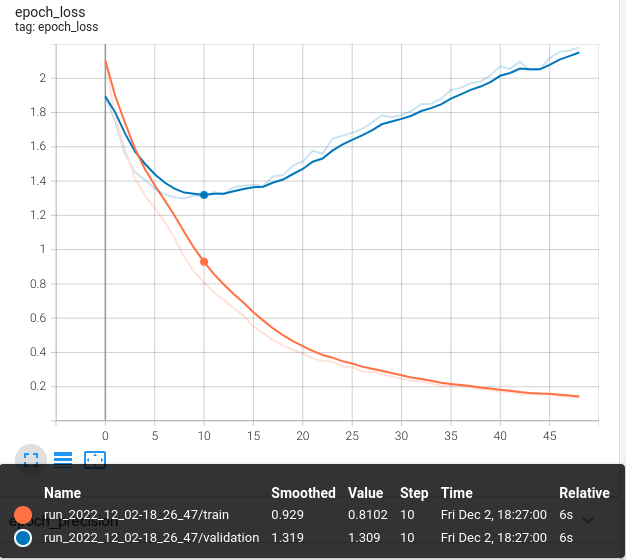


--- 

Em síntese, temos um modelo considerado baseline o ponto de partida, destaca-se que não atingimos o dejesamos em machine learning que **os algoritmos de aprendizado de máquina são criados para minimizar erros**, isso mostra a perda em validação do apresentando problemático, pois esse é cerne em machine learning. No entanto, a avaliação em problemas multicasses quão é complexo avalia um modelo com essa característica. Entretanto, costuma ser vantajoso converter problemas multiclasses em uma série de problemas binários. Isso é especialmente real quando uma categoria é muito mais comum que outras categorias.

---

### Evaluate o melhor modelo nos dados de teste fora do conjunto de dados.

In [50]:
#convert column names to lowercase
full_test.columns = full_test.columns.str.lower()

# junção por Gene e Variation para forma uma novo texto
full_test['new_text'] = full_test['gene'] + ' ' + full_test['variation']

# Chamada da function
full_test['new_text'] = full_test.new_text.apply(preprocess_text)

# show dataset
full_test.head()

,id,gene,variation,new_text
0,0,ACSL4,R570S,acsl4 r570s
1,1,NAGLU,P521L,naglu p521l
2,2,PAH,L333F,pah l333f
3,3,ING1,A148D,ing1 a148d
4,4,TMEM216,G77A,tmem216 g77a


In [51]:
# salvando o file
full_test.to_csv("data_files/test.csv",index = False,header=True, sep=',',encoding = 'utf-8')

### Aplicando text_to_sequences no texto

In [52]:
#conversão de tokens de corpus de texto em uma sequência de inteiros 
seq_text = tokenizer.texts_to_sequences(full_test.new_text)

# Truncando e preenchendo as sequências de entrada para que todas tenham o mesmo comprimento para modelagem.

padded_testing = pad_sequences(seq_text, padding = 'post', maxlen=max_seq_len)
print('Shape of test tensor: ', padded_testing.shape)

Shape of test tensor:  (5668, 6)


### Predictions

Por fim, vamos efetuar as previsões dos dados de teste e submetê-las no site da competição no Kaggle.

In [53]:
# Model Evaaluation on Test Data
Y_pred =mutations_bi_lstm.predict(padded_testing).round(2)
#y_pred_ohe_hot_encoded =model_bi_lstm.predict(padded_test > 0.5).astype("int32")

In [54]:
Y_pred

array([[0.  , 0.11, 0.07, ..., 0.06, 0.  , 0.  ],
       [0.  , 0.11, 0.07, ..., 0.06, 0.  , 0.  ],
       [0.  , 0.11, 0.07, ..., 0.06, 0.  , 0.  ],
       ...,
       [0.  , 0.11, 0.07, ..., 0.06, 0.  , 0.  ],
       [0.  , 0.11, 0.07, ..., 0.06, 0.  , 0.  ],
       [0.  , 0.11, 0.07, ..., 0.06, 0.  , 0.  ]], dtype=float32)

In [55]:
predicted_class  = np.array(tf.argmax(Y_pred, axis= 1))
full_test['predicted_class'] = predicted_class
#onehot = pd.get_dummies(full_test['predicted_class'])
#full_test = full_test.join(onehot)
full_test.head(10)

,id,gene,variation,new_text,predicted_class
0,0,ACSL4,R570S,acsl4 r570s,4
1,1,NAGLU,P521L,naglu p521l,4
2,2,PAH,L333F,pah l333f,4
3,3,ING1,A148D,ing1 a148d,4
4,4,TMEM216,G77A,tmem216 g77a,4
5,5,CD40LG,A123E,cd40lg a123e,4
6,6,KLF11,T220M,klf11 t220m,4
7,7,SGCB,T151R,sgcb t151r,4
8,8,CLCF1,R197L,clcf1 r197l,4
9,9,SDHAF1,R55P,sdhaf1 r55p,4


### Preparando os dados de envio

In [56]:
submit = pd.DataFrame(Y_pred, columns=[f'class{i}' for i in range(0,10)])
# excluir class0, pois ela serve para preenchimento
submit.drop(['class0'],axis =1, inplace= True)
submit.insert(loc=0, column='id', value=full_test.id)
submit.head(10)

,id,class1,class2,class3,class4,class5,class6,class7,class8,class9
0,0,0.11,0.07,0.01,0.67,0.04,0.04,0.06,0.0,0.0
1,1,0.11,0.07,0.01,0.67,0.04,0.04,0.06,0.0,0.0
2,2,0.11,0.07,0.01,0.67,0.04,0.04,0.06,0.0,0.0
3,3,0.11,0.07,0.01,0.67,0.04,0.04,0.06,0.0,0.0
4,4,0.11,0.07,0.01,0.67,0.04,0.04,0.06,0.0,0.0
5,5,0.11,0.07,0.01,0.67,0.04,0.04,0.06,0.0,0.0
6,6,0.11,0.07,0.01,0.67,0.04,0.04,0.06,0.0,0.0
7,7,0.11,0.07,0.01,0.67,0.04,0.04,0.06,0.0,0.0
8,8,0.11,0.07,0.01,0.67,0.04,0.04,0.06,0.0,0.0
9,9,0.11,0.07,0.01,0.67,0.04,0.04,0.06,0.0,0.0


In [57]:
# Arquivo de envio
submit.to_csv('submission_file_predict/submission.csv', index=False) 

---

### Análise de classes desbalanceadas

#### Como definir o peso da classe para o conjunto de dados de desequilíbrio no Keras?

Em uma tarefa de classificação, às vezes uma situação em que alguma classe não é distribuída igualmente. O que você faz neste caso? Como lidar com o desequilíbrio de classe? Existem várias técnicas que você pode usar para superar os desequilíbrios de classe. Um deles é definir o peso da classe . Neste tutorial, discutimos como definir o peso da classe para uma classe individual. Dá peso à classe minoritária proporcional à sua sub-representação.


Note-que (Géron, 2021), destaca-se que se o conjunto de treinamento estiver muito assimétrico, com algumas classes sendo representadas em excesso e outras sendo representadas de menos, seria útil definir o argumento **class_weight** ao chamar o método fit(), que daria um peso maior às classes menos representadas e um peso menor às classes representadas em excesso. Esses pesos seriam utilizados pelo Keras ao calcular a perda. Se precisar dos pesos por instância, defina o argumento **sample_weight (ele substitui a class_weight)**. Os pesos por instância podem ser vantajosos se algumas instâncias forem rotuladas por especialistas, enquanto outras forem rotuladas usando uma plataforma de crowdsourcing: você pode dar mais peso à anterior. Você também pode fornecer pesos de amostra (mas não pesos de classe) para o conjunto devalidação, adicionando-os como um terceiro item na tupla validation_data.


- class_weight: índices de classe de mapeamento de dicionário opcional (inteiros) para um valor de peso (float), usado para ponderar a função de perda (somente durante o treinamento). Isso pode ser útil para dizer ao modelo para "prestar mais atenção" às amostras de uma classe sub-representada .

- sample_weight: array Numpy opcional de pesos para as amostras de treinamento, usado para ponderar a função de perda (somente durante o treinamento). Você pode passar um array Numpy plano (1D) com o mesmo comprimento que as amostras de entrada (mapeamento 1:1 entre pesos e amostras) , ou no caso de dados temporais


https://androidkt.com/set-class-weight-for-imbalance-dataset-in-keras/

https://datascience-stackexchange-com.translate.goog/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras?_x_tr_sl=en&_x_tr_tl=pt&_x_tr_hl=pt-BR&_x_tr_pto=wapp

https://stackoverflow-com.translate.goog/questions/48173168/use-both-sample-weight-and-class-weight-simultaneously/48174220?_x_tr_sl=en&_x_tr_tl=pt&_x_tr_hl=pt-BR&_x_tr_pto=wapp#48174220

https://github-com.translate.goog/keras-team/keras/issues/2115?_x_tr_sl=en&_x_tr_tl=pt&_x_tr_hl=pt-BR&_x_tr_pto=wapp

---

### Cálculo dos pesos por classes

In [58]:
# conte valores únicos por classe
uq = np.unique(train_labels_sparse, return_counts=True)
labels_dict = dict(zip(uq[0], uq[1]))
print(labels_dict)

{1: 568, 2: 452, 3: 89, 4: 686, 5: 242, 6: 275, 7: 953, 8: 19, 9: 37}


In [59]:
def get_class_weight(labels_dict):
    """Calcular os pesos de diferentes classes"""

    total = sum(labels_dict.values())
    max_num = max(labels_dict.values())
    mu = 1.0 / (total / max_num)
    class_weight = dict() 
    for key, value in labels_dict.items():
        score = math.log(mu * total / float(value))
        class_weight[key] = score if score > 1.0 else 1.0
    return class_weight

In [60]:
# chamada da function
class_weights = get_class_weight(labels_dict) 
print(class_weights)

{1: 1.0, 2: 1.0, 3: 2.370978533922062, 4: 1.0, 5: 1.370677177497516, 6: 1.242843805987631, 7: 1.0, 8: 3.9151759244877615, 9: 3.248696991009978}


É importante análise que as classes 1,2,4,7, receberão pesos padrão 1.0, pois elas apresenta boas porpoções (relativamente distribuídas), e as classes restantes receberão pesos maiores

**Assim como, temos 9 classes disponíveis, função de loss sparse_categorical_crossentropy espera um dict com 10 posições, começando no índices 0 para preenchimento.**

In [61]:
# reajustando index
weights= {0:0,1: 1.0, 2: 1.0, 3: 2.370978533922062, 4: 1.0, 5: 1.370677177497516, 6: 1.242843805987631, 7: 1.0, 8: 3.9151759244877615, 9: 3.248696991009978}

In [63]:
def build_model_weight(hp):
    model = Sequential()
    
    hp_vector_size = hp.Int('vector_size', min_value= 6, max_value = 16, step = 2)
    
    model.add(
               Embedding(input_dim= max_id,
               output_dim= embed_dim,
               input_length=max_seq_len,
               mask_zero=True)
    )

    hp_spatialDropout1D = hp.Float('spatialDropout1D', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(hp_spatialDropout1D))
    hp_dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(hp_dropout_rate))
    
    hp_lstm_unist1 = hp.Int('lstm_units1',min_value=8, max_value=12,step=2)
    model.add(LSTM(hp_lstm_unist1,return_sequences=True))
    hp_lstm_unist2 = hp.Int('lstm_units2',min_value=4, max_value=8,step=2)
    model.add(LSTM(hp_lstm_unist2))
  
    model.add(Dense(10,activation='softmax'))
    

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3,1e-5,1e-6])
    hp_optimizer = hp.Choice(name="optimizer", values=["adam","nadam"])
    
    model.compile(
        optimizer= hp_optimizer,
        # troca a função de perda 
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
    return model

tuner_weight = kt.BayesianOptimization(
    build_model_weight,
    objective=kt.Objective("val_accuracy", direction="max"),
    max_trials=40,
    executions_per_trial=2,
    directory="research_tuner/mutations_bi_lstm_weight",
    overwrite = True,
)

#### Treinamento com espaço de pesquisa  com o argumento class_weight

In [64]:
keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss",mode='min',patience=20),
]

tuner_weight.search(
            padded_train2, y_train2,
            class_weight=weights,# passando os pesos
            batch_size=10,
            epochs=100,
            validation_split=val_split,
            callbacks=callbacks,
            #verbose = 1
)

# Get the optimal hyperparameters
best_hps_weight=tuner_weight.get_best_hyperparameters(num_trials=1)[0]

Trial 40 Complete [00h 01m 05s]
val_accuracy: 0.5770676732063293

Best val_accuracy So Far: 0.6090225279331207
Total elapsed time: 00h 41m 40s
INFO:tensorflow:Oracle triggered exit


In [65]:
#Retorna uma lista de HyperParameter objetos, que você pode passar para o função de construção de modelo
def best():
    print(best_hps_weight.get('vector_size'))
    print(best_hps_weight.get('spatialDropout1D'))
    print(best_hps_weight.get('dropout_rate'))
    print(best_hps_weight.get('lstm_units1'))
    print(best_hps_weight.get('lstm_units2'))
    print(best_hps_weight.get('learning_rate'))
best()

6
0.1
0.5
12
8
1e-06


#### Criando o modelo com pesos por classes

In [78]:
# criando modelo com melhores HyperParameter ideais
model_bets_hp_weight = tuner_weight.hypermodel.build(best_hps_weight)

run_logdir2 = get_run_logdir()

callbacks= [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        mode='min',patience=20,
        restore_best_weights=True
    ),
    #salva os pontos de verificação do modelo em intervalos regulares durante o treinamento, por padrão
    keras.callbacks.ModelCheckpoint(filepath="models/mutations_bi_lstm_with_weight.h5", save_best_only=True),
    keras.callbacks.TensorBoard(run_logdir2),
    TqdmCallback(verbose=0)
]
model_bets_hp_weight.fit(
          padded_train2,y_train2,
          batch_size=4,
          epochs=100,
          validation_split= val_split,
          verbose=0,
          callbacks=callbacks
)
mutations_bi_lstm_weight = keras.models.load_model("models/mutations_bi_lstm_with_weight.h5") # retornar para o melhor modelo

print('\nAvaliação do modelo em Dados Teste')
model_weight = mutations_bi_lstm_weight.evaluate(padded_test2,y_test2)
model_weight

0epoch [00:00, ?epoch/s]


Avaliação do modelo em Dados Teste
21/21 [==============================] - 2s 2ms/step - loss: 1.2813 - accuracy: 0.5368


[1.281290888786316, 0.5368421077728271]

### Predictions evaluate with Classification Report and Confusion Matrix

Métricas em Teste:
                precision    recall  f1-score   support

           1       0.42      0.63      0.51       114
           2       0.59      0.14      0.23        91
           3       0.00      0.00      0.00        18
           4       0.60      0.57      0.59       137
           5       0.00      0.00      0.00        48
           6       0.46      0.29      0.36        55
           7       0.58      0.93      0.72       191
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         7

    accuracy                           0.54       665
   macro avg       0.30      0.29      0.27       665
weighted avg       0.48      0.54      0.47       665



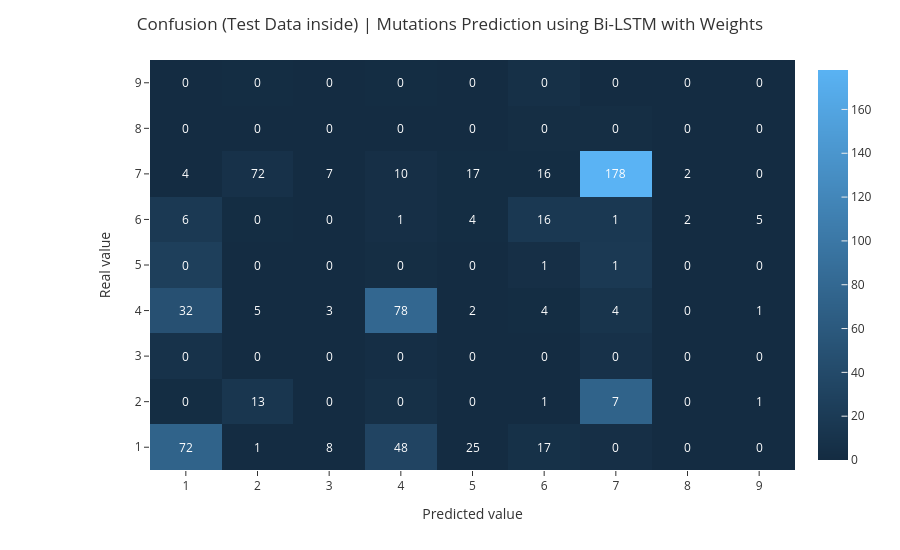

In [110]:
Y_pred_weights =np.argmax(mutations_bi_lstm_weight.predict(padded_test2), axis=-1)
#y_pred_ohe_hot_encoded =model_bi_lstm.predict(padded_test > 0.5).astype("int32")

print("Métricas em Teste:\n ", classification_report(y_test2,Y_pred_weights))
print('='*110)

# chamada da function
plot_confusion_matrix(confusion_matrix(y_test2, Y_pred_weights),df_merge['class'].unique(),'Confusion (Test Data inside) | Mutations Prediction using Bi-LSTM with Weights')

### Predictions

Por fim, vamos efetuar as previsões dos dados de teste e submetê-las no site da competição no Kaggle.

In [111]:
predicted_class_weights = mutations_bi_lstm_weight.predict(padded_testing).round(2)
#Se você se importa somente com a classe com a maior probabilidade estimada(ainda que essa probabilidade seja muito baixa), use o método
#y_pred = np.argmax(model.predict(X_new), axis=-1)

### Preparando os dados de envio com pesos por classes

In [112]:
submit_weights = pd.DataFrame(predicted_class_weights, columns=[f'class{i}' for i in range(0,10)])
submit_weights.drop(['class0'],axis =1, inplace= True)
submit_weights.insert(loc=0, column='id', value=full_test.id)
submit_weights.head(10)

,id,class1,class2,class3,class4,class5,class6,class7,class8,class9
0,0,0.51,0.02,0.02,0.19,0.1,0.13,0.01,0.01,0.01
1,1,0.51,0.02,0.02,0.19,0.1,0.13,0.01,0.01,0.01
2,2,0.51,0.02,0.02,0.19,0.1,0.13,0.01,0.01,0.01
3,3,0.51,0.02,0.02,0.19,0.1,0.13,0.01,0.01,0.01
4,4,0.51,0.02,0.02,0.19,0.1,0.13,0.01,0.01,0.01
5,5,0.51,0.02,0.02,0.19,0.1,0.13,0.01,0.01,0.01
6,6,0.51,0.02,0.02,0.19,0.1,0.13,0.01,0.01,0.01
7,7,0.51,0.02,0.02,0.19,0.1,0.13,0.01,0.01,0.01
8,8,0.51,0.02,0.02,0.19,0.1,0.13,0.01,0.01,0.01
9,9,0.51,0.02,0.02,0.19,0.1,0.13,0.01,0.01,0.01


In [113]:
# Arquivo de envio
submit_weights.to_csv('submission_file_predict/submission_weight_by_classes.csv', index=False) 